In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_data.csv')

/Users/gauravbhandari11/da/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3291: DtypeWarning: Columns (23,24,25,26,49,89,93,105,122,123,124,125,126,127,128,129,130,131,132,146,147,148,212,213,214,215,216,217,218,219,221) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Define the columns to drop
columns_to_drop = [
    'RECTYPE', 'HHX', 'WTFA_A', 'HHRESPSA_FLG', 'INTV_QRT', 'INTV_MON',
    'HHSTAT_A', 'HISDETP_A', 'EVRMARRIED_A', 'EMPLASTWK_A', 'EMPNOWRK_A',
    'EMPWHYNOT_A', 'EMPWHENWRK_A', 'IMPNUM_A', 'SSISSDIBTH_A', 'SSISSDIDSB_A',
    'INCTCFLG_A', 'MAXCHNG_A', 'PLNEXCHG1_A', 'PLN1PAY1_A', 'PLN1PAY2_A',
    'PLN1PAY3_A', 'PLN1PAY4_A', 'PLN1PAY5_A', 'PLN1PAY6_A', 'EXCHPR1_A',
    'OPPREM_A', 'OPDEDUC_A', 'OPHDHP_A', 'OGPREM_A', 'OGDEDUC_A', 'OGHDHP_A',
    'HISTOPJOB_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A',
    'RSNHIWAIT_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A',
    'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A',
    'HIKIND09_A', 'HIKIND10_A', 'WELLVIS_A', 'SHTPNUEV_A', 'CHL12M_A',
    'CHLMED_A', 'HYPDIF_A', 'HYP12M_A', 'HYPMED_A', 'ASAT12M_A', 'LSATIS4_A',
    'EMPDYSMSS3_A', 'DIFF_A', 'HEARINGDF_A.1', 'UPPRAISE_A'
]

# Drop the columns from the dataframe
df = df.drop(columns=columns_to_drop)

# If you want to make sure the code doesn't break if some columns are not present,
# you can use the following line instead:
# df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [4]:
df.columns

Index(['SRVY_YR', 'URBRRL', 'REGION', 'SEX_A', 'AGEP_A', 'AGE_FINAL_A',
       'HISP_A', 'HISPALLP_A', 'RACEALLP_A', 'MARITAL_A',
       ...
       'SOCWRKLIM_A', 'WLK100_A', 'WLK13M_A', 'STEPS_A', 'VISIONDF_A',
       'HEARAID_A', 'COMDIFF_A', 'COGMEMDFF_A', 'UPPSLFCR_A', 'UPPOBJCT_A'],
      dtype='object', length=177)

In [5]:
# Descriptive Statistics
# age_describe = df['AGEP_A'].describe()
# print(age_describe)

In [6]:
# Histogram
# plt.figure(figsize=(30, 6))
# sns.histplot(df['AGEP_A'], kde=False, bins=30)
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

In [7]:
# Density Plot
# plt.figure(figsize=(10, 6))
# sns.kdeplot(df['AGEP_A'], shade=True)
# plt.title('Age Density Plot')
# plt.xlabel('Age')
# plt.ylabel('Density')
# plt.show()

In [8]:
# Calculate frequencies
urbrrl_freq = df['URBRRL'].value_counts()
region_freq = df['REGION'].value_counts()

# Calculate proportions
urbrrl_props = df['URBRRL'].value_counts(normalize=True) * 100
region_props = df['REGION'].value_counts(normalize=True) * 100

# Print frequencies and proportions
print("URBRRL Frequencies:\n", urbrrl_freq)
print("\nURBRRL Proportions (%):\n", urbrrl_props)
print("\nREGION Frequencies:\n", region_freq)
print("\nREGION Proportions (%):\n", region_props)

URBRRL Frequencies:
 Medium and Small Metro    38071
Large Central Metro       35962
Large Fringe Metro        28249
Nonmetropolitan           18416
Name: URBRRL, dtype: int64

URBRRL Proportions (%):
 Medium and Small Metro    31.542362
Large Central Metro       29.795026
Large Fringe Metro        23.404696
Nonmetropolitan           15.257916
Name: URBRRL, dtype: float64

REGION Frequencies:
 South        43486
West         30179
Midwest      26639
Northeast    20394
Name: REGION, dtype: int64

REGION Proportions (%):
 South        36.028766
West         25.003728
Midwest      22.070788
Northeast    16.896717
Name: REGION, dtype: float64


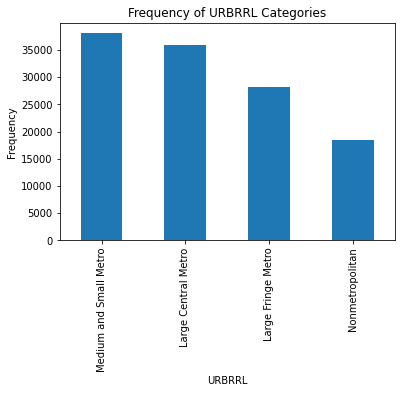

In [9]:
# Plot bar chart for URBRRL
urbrrl_freq.plot(kind='bar')
plt.title('Frequency of URBRRL Categories')
plt.xlabel('URBRRL')
plt.ylabel('Frequency')
plt.show()

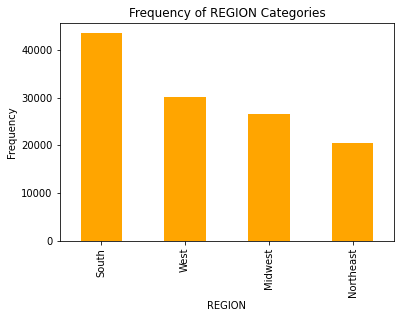

In [10]:
# Plot bar chart for REGION
region_freq.plot(kind='bar', color='orange')  # You can change the color
plt.title('Frequency of REGION Categories')
plt.xlabel('REGION')
plt.ylabel('Frequency')
plt.show()

In [137]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame with 'REGION' and 'URBRRL' as column names

# Create a cross-tabulation
contingency_table = pd.crosstab(df['REGION'], df['URBRRL'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the actual counts
print("Actual counts:")
print(contingency_table)

# Output the results of the Chi-square test
print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected counts:")
print(expected)

# Interpret the p-value
alpha = 0.05  # Common threshold for significance
print("\nSignificance level: ", alpha)
print("P-value: ", p)
if p < alpha:
    print("There is a significant association between REGION and URBRRL. (reject H0)")
else:
    print("There is no significant association between REGION and URBRRL. (fail to reject H0)")


Actual counts:
URBRRL     Large Central Metro  Large Fringe Metro  Medium and Small Metro  \
REGION                                                                       
Midwest                   5648                6667                    7886   
Northeast                 5825                7450                    5529   
South                    11122               10358                   14509   
West                     13367                3774                   10147   

URBRRL     Nonmetropolitan  
REGION                      
Midwest               6438  
Northeast             1590  
South                 7497  
West                  2891  

Chi-square statistic: 9251.10804510214
P-value: 0.0
Degrees of freedom: 9

Expected counts:
[[ 7937.09686987  6234.77697228  8402.56979403  4064.55636382]
 [ 6076.39752109  4773.15370594  6432.74929162  3111.69948135]
 [12956.66483289 10177.76611046 13716.51150806  6635.05754859]
 [ 8991.84077615  7063.30321132  9519.16940629  4604.6866062

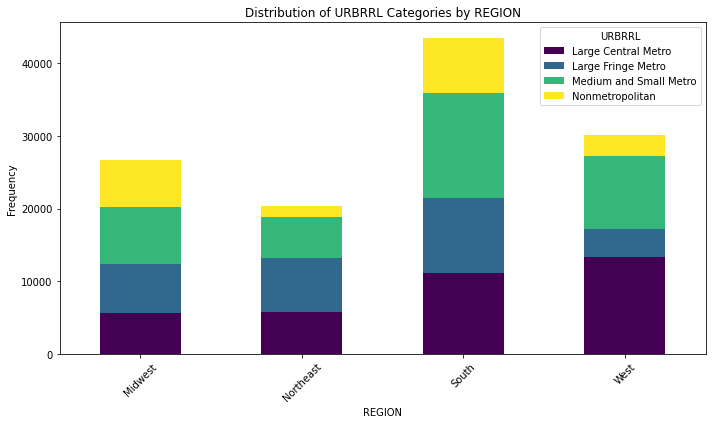

In [138]:
# Create a cross-tabulation
contingency_table = pd.crosstab(df['REGION'], df['URBRRL'])

# Plot a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribution of URBRRL Categories by REGION')
plt.xlabel('REGION')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='URBRRL')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

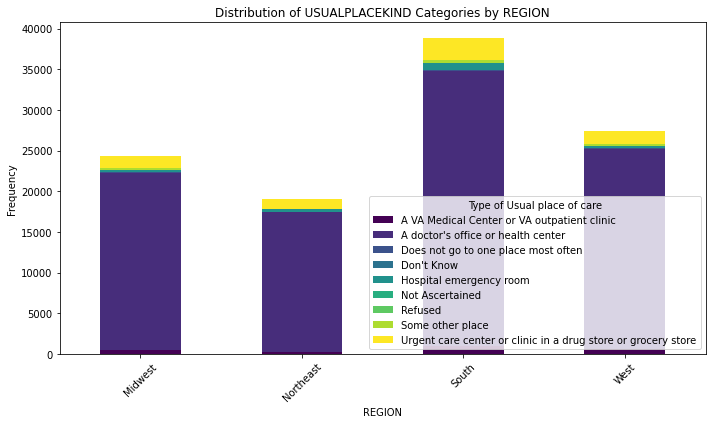

In [143]:
# Create a cross-tabulation
contingency_table_3 = pd.crosstab(df['REGION'], df['USPLKIND_A'])

# Plot a stacked bar chart
contingency_table_3.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribution of USUALPLACEKIND Categories by REGION')
plt.xlabel('REGION')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Type of Usual place of care')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

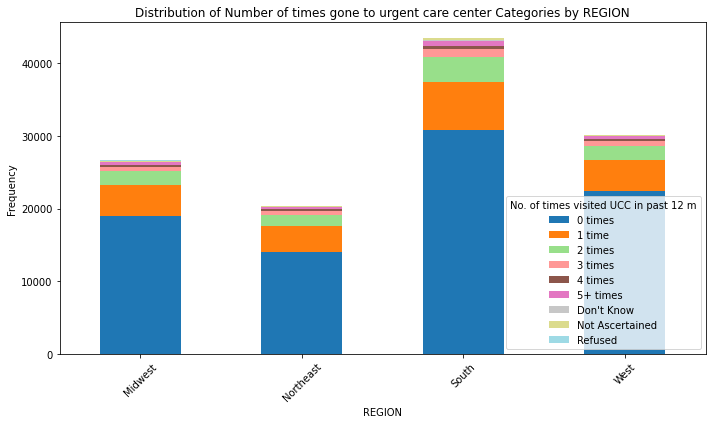

In [147]:
# Create a cross-tabulation
contingency_table_4 = pd.crosstab(df['REGION'], df['URGNT12MTC_A'])

# Plot a stacked bar chart
contingency_table_4.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Distribution of Number of times gone to urgent care center Categories by REGION')
plt.xlabel('REGION')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='No. of times visited UCC in past 12 m')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

SEX Frequencies:
 Female        65458
Male          55230
Refused           6
Don't Know        4
Name: SEX_A, dtype: int64

SEX Proportions (%):
 Female        54.232879
Male          45.758836
Refused        0.004971
Don't Know     0.003314
Name: SEX_A, dtype: float64


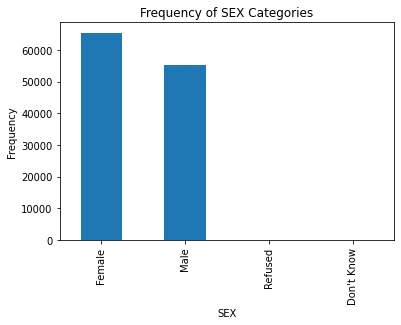

In [11]:
sex_freq = df['SEX_A'].value_counts()
sex_props = df['SEX_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("SEX Frequencies:\n", sex_freq)
print("\nSEX Proportions (%):\n", sex_props)

# Plot bar chart for URBRRL
sex_freq.plot(kind='bar')
plt.title('Frequency of SEX Categories')
plt.xlabel('SEX')
plt.ylabel('Frequency')
plt.show()

Race Frequencies:
 White only                         90826
Black/African American only        13414
Asian only                          6896
Not Ascertained                     5841
Other single and multiple races     1544
AIAN and any other group            1057
AIAN only                           1014
Don't know                            54
Refused                               52
Name: RACEALLP_A, dtype: int64

Race Proportions (%):
 White only                         75.250626
Black/African American only        11.113689
Asian only                          5.713434
Not Ascertained                     4.839351
Other single and multiple races     1.279226
AIAN and any other group            0.875739
AIAN only                           0.840113
Don't know                          0.044740
Refused                             0.043083
Name: RACEALLP_A, dtype: float64


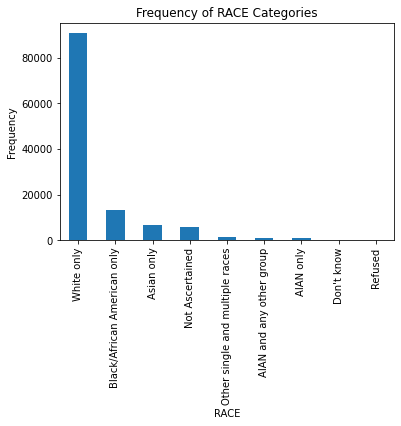

In [13]:
race_freq = df['RACEALLP_A'].value_counts()
race_props = df['RACEALLP_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Race Frequencies:\n", race_freq)
print("\nRace Proportions (%):\n", race_props)

# Plot bar chart for URBRRL
race_freq.plot(kind='bar')
plt.title('Frequency of RACE Categories')
plt.xlabel('RACE')
plt.ylabel('Frequency')
plt.show()

In [140]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame with 'REGION' and 'URBRRL' as column names

# Create a cross-tabulation
contingency_table_2 = pd.crosstab(df['SEX_A'], df['RACEALLP_A'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_2)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected counts:")
print(expected)

# Interpret the p-value
alpha = 0.05  # Common threshold for significance
print("\nSignificance level: ", alpha)
print("P-value: ", p)
if p < alpha:
    print("There is a significant association between SEX and RACE. (reject H0)")
else:
    print("There is no significant association between SEX and RACE. (fail to reject H0)")


Chi-square statistic: 169.68108259759575
P-value: 6.716798008925994e-24
Degrees of freedom: 24

Expected counts:
[[3.50295780e-02 3.36045336e-02 2.28537341e-01 4.44547548e-01
  1.78959055e-03 1.93574044e-01 5.11690335e-02 1.72330942e-03
  3.01002502e+00]
 [5.73241528e+02 5.49921391e+02 3.73989932e+03 7.27479836e+03
  2.92857545e+01 3.16774245e+03 8.37355648e+02 2.82010970e+01
  4.92575545e+04]
 [4.83670898e+02 4.63994598e+02 3.15552934e+03 6.13809027e+03
  2.47097715e+01 2.67277362e+03 7.06516429e+02 2.37945948e+01
  4.15609205e+04]
 [5.25443669e-02 5.04068004e-02 3.42806012e-01 6.66821323e-01
  2.68438582e-03 2.90361066e-01 7.67535502e-02 2.58496413e-03
  4.51503753e+00]]

Significance level:  0.05
P-value:  6.716798008925994e-24
There is a significant association between SEX and RACE. (reject H0)


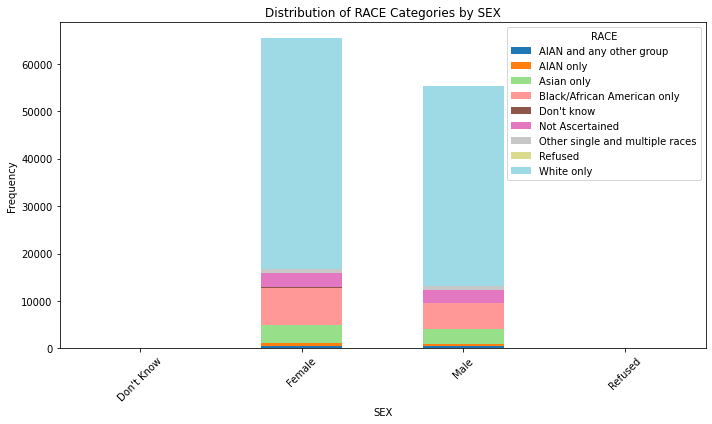

In [148]:
# Create a cross-tabulation
contingency_table_2 = pd.crosstab(df['SEX_A'], df['RACEALLP_A'])

# Plot a stacked bar chart
contingency_table_2.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Distribution of RACE Categories by SEX')
plt.xlabel('SEX')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='RACE')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

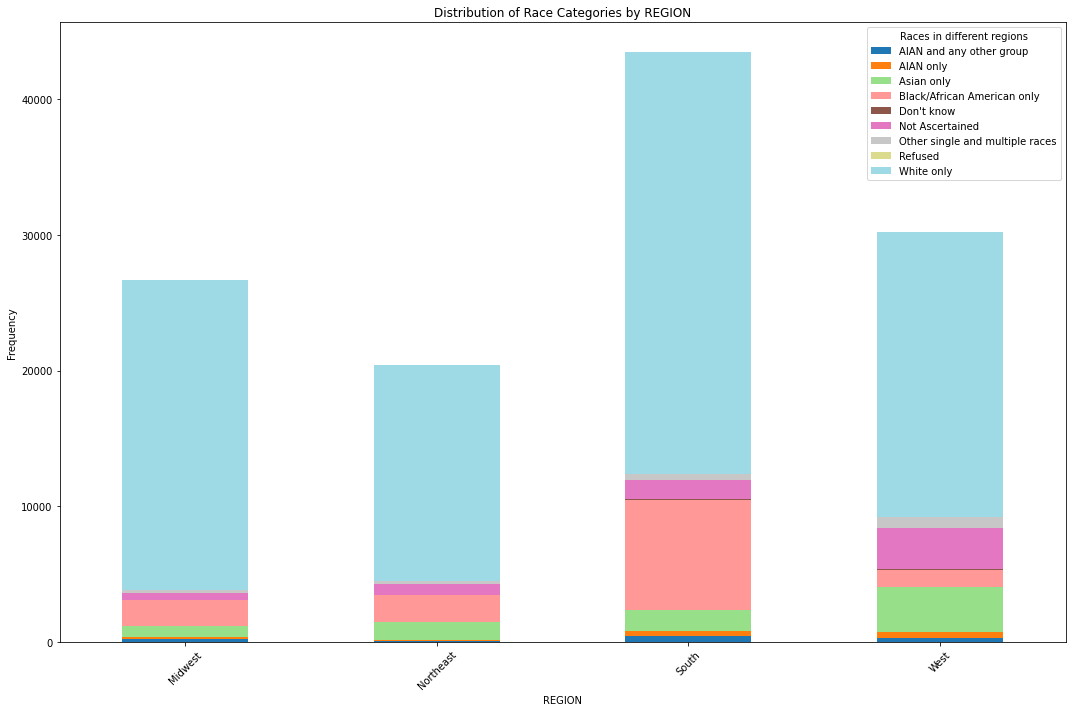

In [155]:
# Create a cross-tabulation
contingency_table_7 = pd.crosstab(df['REGION'], df['RACEALLP_A'])

# Plot a stacked bar chart
contingency_table_7.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title('Distribution of Race Categories by REGION')
plt.xlabel('REGION')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Races in different regions')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

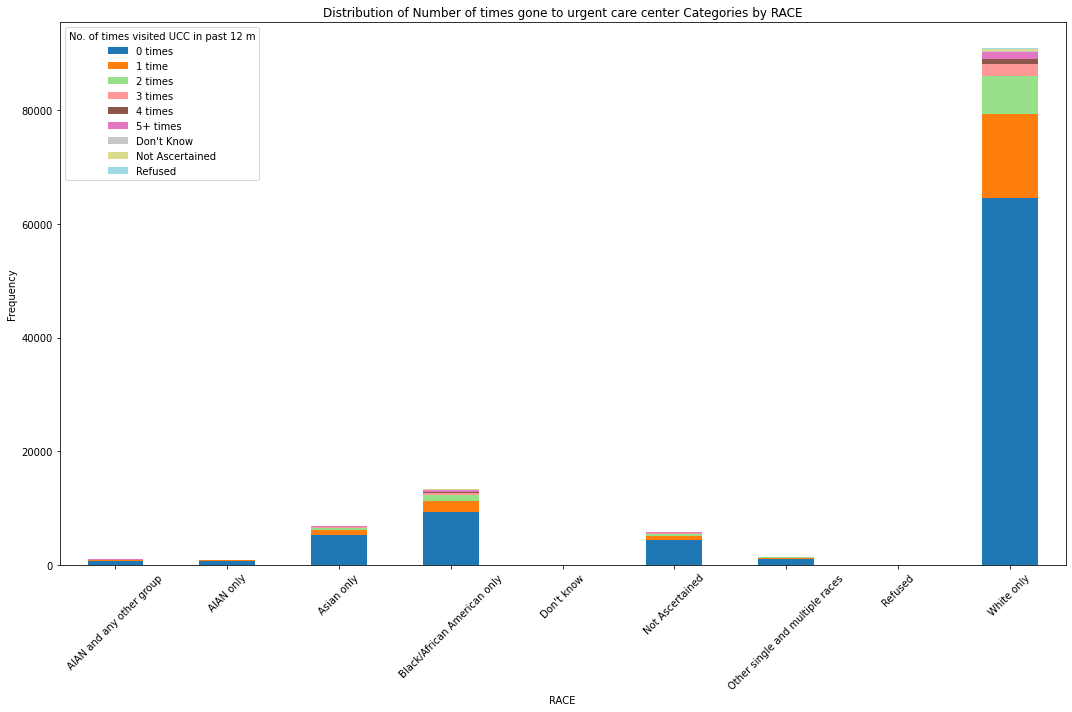

In [154]:
# Create a cross-tabulation
contingency_table_7 = pd.crosstab(df['RACEALLP_A'], df['URGNT12MTC_A'])

# Plot a stacked bar chart
contingency_table_7.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title('Distribution of Number of times gone to urgent care center Categories by RACE')
plt.xlabel('RACE')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='No. of times visited UCC in past 12 m')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

AGE Group Frequencies:
 18-44          43865
45-64          39564
65-74          21016
75 and over    15952
Refused          271
Don't Know        30
Name: AGE_FINAL_A, dtype: int64

AGE Group Proportions (%):
 18-44          36.342773
45-64          32.779334
65-74          17.412053
75 and over    13.216458
Refused         0.224527
Don't Know      0.024855
Name: AGE_FINAL_A, dtype: float64


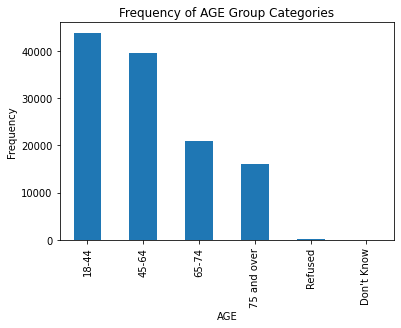

In [133]:
Age_freq = df['AGE_FINAL_A'].value_counts()
Age_props = df['AGE_FINAL_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("AGE Group Frequencies:\n", Age_freq)
print("\nAGE Group Proportions (%):\n", Age_props)

# Plot bar chart for URBRRL
Age_freq.plot(kind='bar')
plt.title('Frequency of AGE Group Categories')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

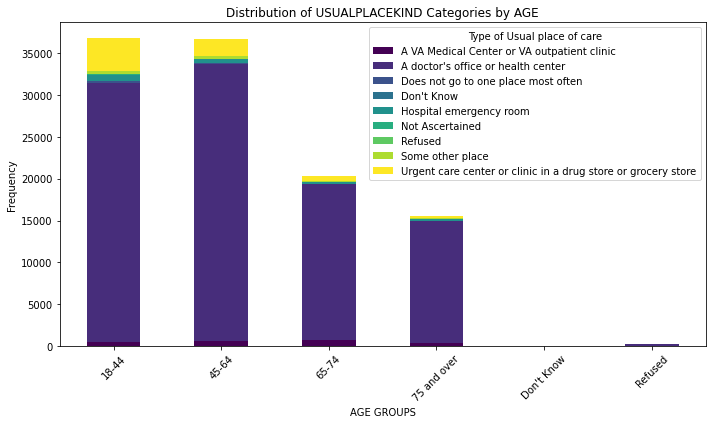

In [149]:
# Create a cross-tabulation
contingency_table_5 = pd.crosstab(df['AGE_FINAL_A'], df['USPLKIND_A'])

# Plot a stacked bar chart
contingency_table_5.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribution of USUALPLACEKIND Categories by AGE')
plt.xlabel('AGE GROUPS')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Type of Usual place of care')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

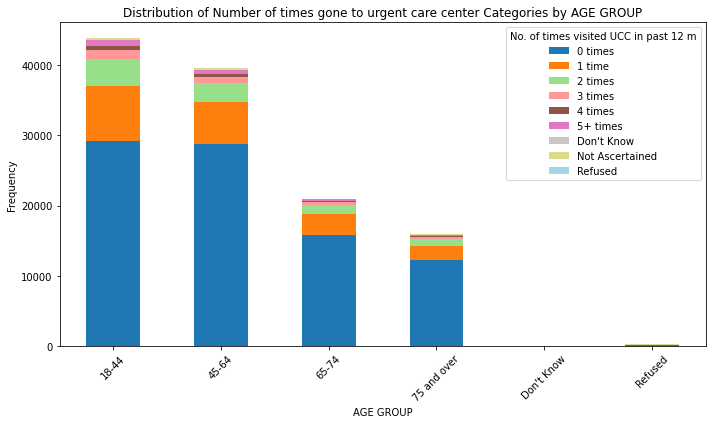

In [150]:
# Create a cross-tabulation
contingency_table_6 = pd.crosstab(df['AGE_FINAL_A'], df['URGNT12MTC_A'])

# Plot a stacked bar chart
contingency_table_6.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Distribution of Number of times gone to urgent care center Categories by AGE GROUP')
plt.xlabel('AGE GROUP')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='No. of times visited UCC in past 12 m')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

Hispanic Frequencies:
 Non-Hispanic White only                     81905
Hispanic                                    16009
Non-Hispanic Black/African American only    12956
Non-Hispanic Asian only                      6803
Other single and multiple races              1354
Non-Hispanic AIAN and any other group         901
Non-Hispanic AIAN only                        770
Name: HISPALLP_A, dtype: int64

Hispanic Proportions (%):
 Non-Hispanic White only                     67.859451
Hispanic                                    13.263683
Non-Hispanic Black/African American only    10.734229
Non-Hispanic Asian only                      5.636382
Other single and multiple races              1.121808
Non-Hispanic AIAN and any other group        0.746491
Non-Hispanic AIAN only                       0.637956
Name: HISPALLP_A, dtype: float64


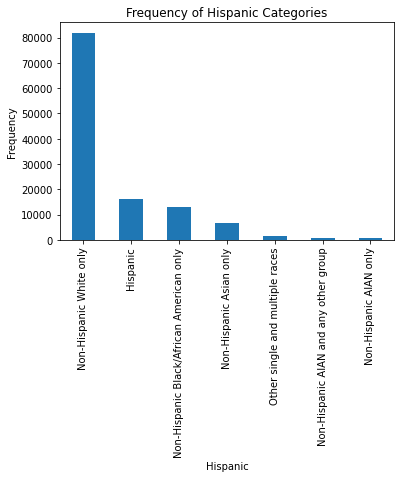

In [14]:
hisp_freq = df['HISPALLP_A'].value_counts()
hisp_props = df['HISPALLP_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Hispanic Frequencies:\n", hisp_freq)
print("\nHispanic Proportions (%):\n", hisp_props)

# Plot bar chart for URBRRL
hisp_freq.plot(kind='bar')
plt.title('Frequency of Hispanic Categories')
plt.xlabel('Hispanic')
plt.ylabel('Frequency')
plt.show()

Marital Status Frequencies:
 Married, spouse is present          52057
Never married                       24143
Divorced                            16217
Widowed                             11777
Living with a partner                7638
Unknown marital status               4097
Married, spouse is not present       3037
Separated                            1710
Married, spouse presence unknown       22
Name: MARSTAT_A, dtype: int64

Marital Status Proportions (%):
 Married, spouse is present          43.129961
Never married                       20.002817
Divorced                            13.436014
Widowed                              9.757411
Living with a partner                6.328191
Unknown marital status               3.394422
Married, spouse is not present       2.516197
Separated                            1.416759
Married, spouse presence unknown     0.018227
Name: MARSTAT_A, dtype: float64


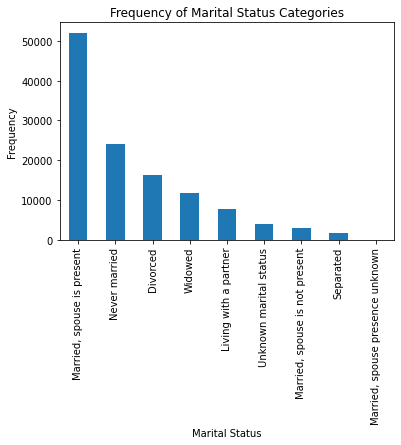

In [15]:
marital_status_freq = df['MARSTAT_A'].value_counts()
marital_status_props = df['MARSTAT_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Marital Status Frequencies:\n", marital_status_freq)
print("\nMarital Status Proportions (%):\n", marital_status_props)

# Plot bar chart for URBRRL
marital_status_freq.plot(kind='bar')
plt.title('Frequency of Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

US Born Frequencies:
 Yes                98487
No                 18561
Not Ascertained     3511
Refused              124
Don't know            15
Name: NATUSBORN_A, dtype: int64

US Born Proportions (%):
 Yes                81.597872
No                 15.378051
Not Ascertained     2.908913
Refused             0.102736
Don't know          0.012428
Name: NATUSBORN_A, dtype: float64


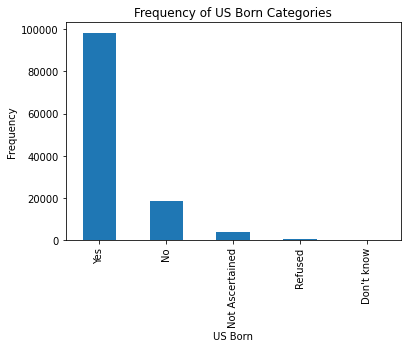

In [16]:
US_Born_freq = df['NATUSBORN_A'].value_counts()
US_Born_props = df['NATUSBORN_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("US Born Frequencies:\n", US_Born_freq)
print("\nUS Born Proportions (%):\n", US_Born_props)

# Plot bar chart for URBRRL
US_Born_freq.plot(kind='bar')
plt.title('Frequency of US Born Categories')
plt.xlabel('US Born')
plt.ylabel('Frequency')
plt.show()

Education Level Frequencies:
 Bachelors degree                                                    27633
High School Graduate                                                27205
Some college, no degree                                             18752
Masters degree                                                      13263
Associate degree: academic program                                  10952
Grade 1-11                                                           8321
Associate degree: occupational, technical, or vocational program     4671
Professional School or Doctoral degree                               3186
GED or equivalent                                                    2716
12th grade, no diploma                                               1845
11                                                                   1373
Don't know                                                            429
Refused                                                               200
Never at

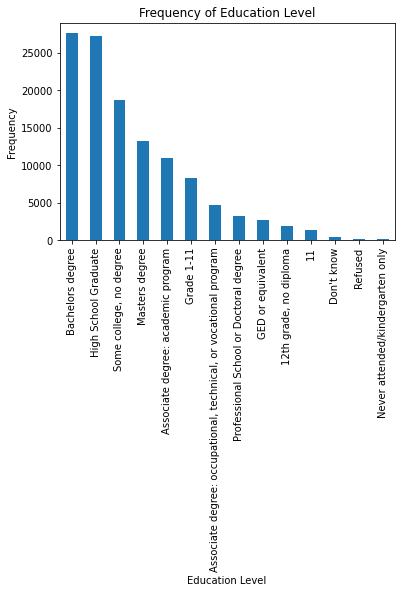

In [17]:
edu_level_freq = df['EDUCP_A'].value_counts()
edu_level_props = df['EDUCP_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Education Level Frequencies:\n", edu_level_freq)
print("\nEducation Level (%):\n", edu_level_props)

# Plot bar chart for URBRRL
edu_level_freq.plot(kind='bar')
plt.title('Frequency of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

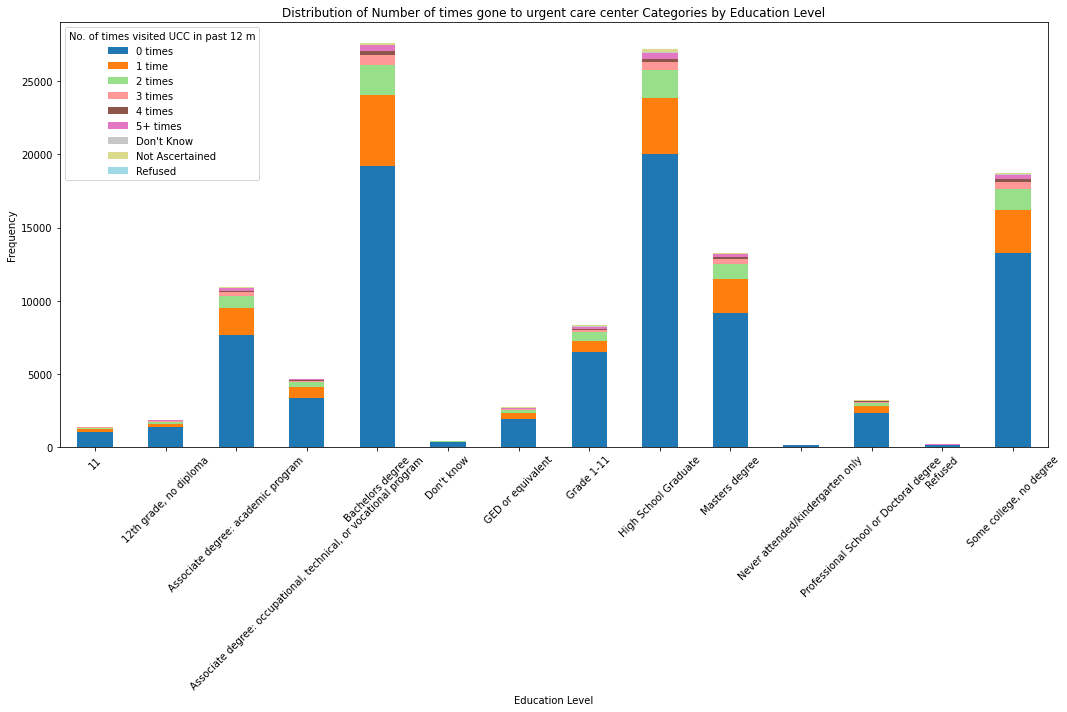

In [156]:
# Create a cross-tabulation
contingency_table_8 = pd.crosstab(df['EDUCP_A'], df['URGNT12MTC_A'])

# Plot a stacked bar chart
contingency_table_8.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title('Distribution of Number of times gone to urgent care center Categories by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='No. of times visited UCC in past 12 m')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

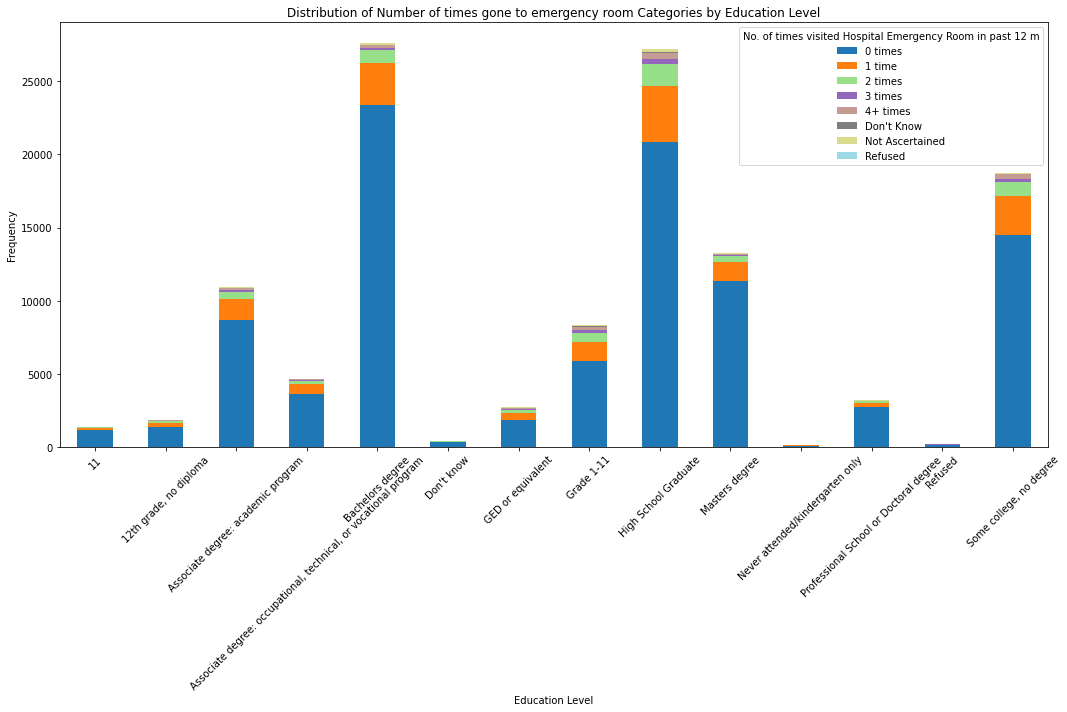

In [160]:
# Create a cross-tabulation
contingency_table_9 = pd.crosstab(df['EDUCP_A'], df['EMERG12MTC_A'])

# Plot a stacked bar chart
contingency_table_9.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title('Distribution of Number of times gone to emergency room Categories by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='No. of times visited Hospital Emergency Room in past 12 m')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

Employed Frequencies:
 Yes           68036
No            48754
Don't know     3908
Name: EMPWRKLSW1_A, dtype: int64

Employed Proportions (%):
 Yes           56.368788
No            40.393379
Don't know     3.237833
Name: EMPWRKLSW1_A, dtype: float64


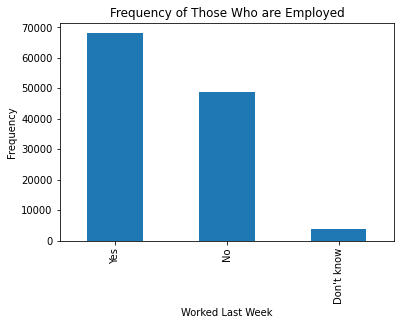

In [18]:
Worked_lastweek_freq = df['EMPWRKLSW1_A'].value_counts()
Worked_lastweek_props = df['EMPWRKLSW1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Employed Frequencies:\n", Worked_lastweek_freq)
print("\nEmployed Proportions (%):\n", Worked_lastweek_props)

# Plot bar chart for URBRRL
Worked_lastweek_freq.plot(kind='bar')
plt.title('Frequency of Those Who are Employed')
plt.xlabel('Worked Last Week')
plt.ylabel('Frequency')
plt.show()

Last time worked for pay Frequencies:
 Over 5 years ago             28854
1-5 years ago                10873
Within the past 12 months     7026
Never worked                  2048
Not Ascertained                405
Refused                         66
Don't know                      57
Name: EMPLSTWOR1_A, dtype: int64

Last time worked for pay Proportions (%):
 Over 5 years ago             58.492976
1-5 years ago                22.041801
Within the past 12 months    14.243143
Never worked                  4.151716
Not Ascertained               0.821018
Refused                       0.133796
Don't know                    0.115551
Name: EMPLSTWOR1_A, dtype: float64


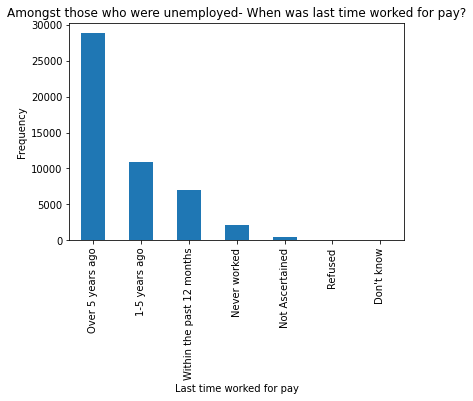

In [19]:
Ltime_wforpay_freq = df['EMPLSTWOR1_A'].value_counts()
Ltime_wforpay_props = df['EMPLSTWOR1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last time worked for pay Frequencies:\n", Ltime_wforpay_freq)
print("\nLast time worked for pay Proportions (%):\n", Ltime_wforpay_props)

# Plot bar chart for URBRRL
Ltime_wforpay_freq.plot(kind='bar')
plt.title('Amongst those who were unemployed- When was last time worked for pay?')
plt.xlabel('Last time worked for pay')
plt.ylabel('Frequency')
plt.show()

Works hours per week Frequencies:
 21-40 hours        39120
41-60 hours        18289
1-20 hours          7254
60-95 hours         2397
Not Ascertained      335
Don't know           280
95+ hours            137
Refused              117
Name: EMPWKHRS3_FINAL_A, dtype: int64

Works hours per week Proportions (%):
 21-40 hours        57.589542
41-60 hours        26.923700
1-20 hours         10.678797
60-95 hours         3.528684
Not Ascertained     0.493162
Don't know          0.412195
95+ hours           0.201681
Refused             0.172239
Name: EMPWKHRS3_FINAL_A, dtype: float64


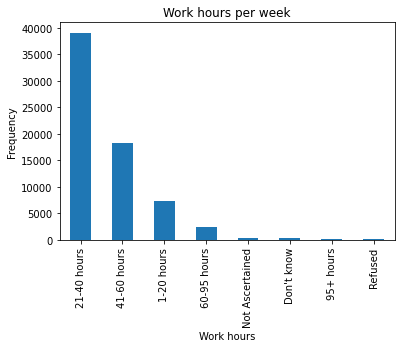

In [20]:
work_hrs_freq = df['EMPWKHRS3_FINAL_A'].value_counts()
work_hrs_props = df['EMPWKHRS3_FINAL_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Works hours per week Frequencies:\n", work_hrs_freq)
print("\nWorks hours per week Proportions (%):\n", work_hrs_props)

# Plot bar chart for URBRRL
work_hrs_freq.plot(kind='bar')
plt.title('Work hours per week')
plt.xlabel('Work hours')
plt.ylabel('Frequency')
plt.show()

35+ hours work per week Frequencies:
 Yes                55571
No                 12020
Not Ascertained      322
Refused               63
Don't know            45
Name: EMPWRKFT1_A, dtype: int64

35+ hours work per week Proportions (%):
 Yes                81.696829
No                 17.671013
Not Ascertained     0.473383
Refused             0.092618
Don't know          0.066156
Name: EMPWRKFT1_A, dtype: float64


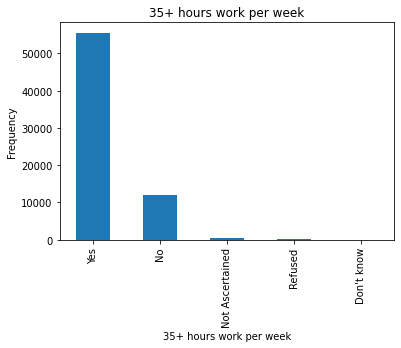

In [21]:
more35_hrs_freq = df['EMPWRKFT1_A'].value_counts()
more35_hrs_props = df['EMPWRKFT1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("35+ hours work per week Frequencies:\n", more35_hrs_freq)
print("\n35+ hours work per week Proportions (%):\n", more35_hrs_props)

# Plot bar chart for URBRRL
more35_hrs_freq.plot(kind='bar')
plt.title('35+ hours work per week')
plt.xlabel('35+ hours work per week')
plt.ylabel('Frequency')
plt.show()

Paid Sick Leave Frequencies:
 Yes                47136
No                 23124
Don't know           612
Refused               66
Not Ascertained       46
Name: EMPSICKLV_A, dtype: int64

Paid Sick Leave Proportions (%):
 Yes                66.403697
No                 32.576355
Don't know          0.862166
Refused             0.092979
Not Ascertained     0.064803
Name: EMPSICKLV_A, dtype: float64


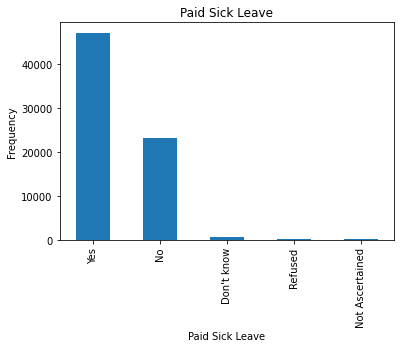

In [22]:
paid_sicklv_freq = df['EMPSICKLV_A'].value_counts()
paid_sicklv_props = df['EMPSICKLV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Paid Sick Leave Frequencies:\n", paid_sicklv_freq)
print("\nPaid Sick Leave Proportions (%):\n", paid_sicklv_props)

# Plot bar chart for URBRRL
paid_sicklv_freq.plot(kind='bar')
plt.title('Paid Sick Leave')
plt.xlabel('Paid Sick Leave')
plt.ylabel('Frequency')
plt.show()

35+ hours work per week Frequencies:
 Yes                55571
No                 12020
Not Ascertained      322
Refused               63
Don't know            45
Name: EMPWRKFT1_A, dtype: int64

35+ hours work per week Proportions (%):
 Yes                81.696829
No                 17.671013
Not Ascertained     0.473383
Refused             0.092618
Don't know          0.066156
Name: EMPWRKFT1_A, dtype: float64


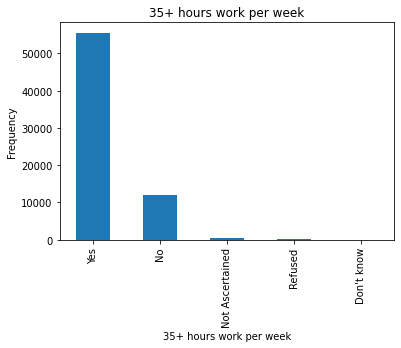

In [23]:
more35_hrs_freq = df['EMPWRKFT1_A'].value_counts()
more35_hrs_props = df['EMPWRKFT1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("35+ hours work per week Frequencies:\n", more35_hrs_freq)
print("\n35+ hours work per week Proportions (%):\n", more35_hrs_props)

# Plot bar chart for URBRRL
more35_hrs_freq.plot(kind='bar')
plt.title('35+ hours work per week')
plt.xlabel('35+ hours work per week')
plt.ylabel('Frequency')
plt.show()

No. of Adults in Family Working Frequencies:
 1 adult            43314
0 adults           37825
2 adults           31597
3+ adults           6327
Not Ascertained     1635
Name: PCNTADTWKP_A, dtype: int64

No. of Adults in Family Working Proportions (%):
 1 adult            35.886262
0 adults           31.338547
2 adults           26.178561
3+ adults           5.242009
Not Ascertained     1.354621
Name: PCNTADTWKP_A, dtype: float64


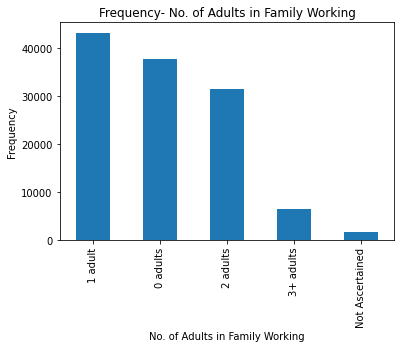

In [24]:
noadults_working_freq = df['PCNTADTWKP_A'].value_counts()
noadults_working_props = df['PCNTADTWKP_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("No. of Adults in Family Working Frequencies:\n", noadults_working_freq)
print("\nNo. of Adults in Family Working Proportions (%):\n", noadults_working_props)

# Plot bar chart for URBRRL
noadults_working_freq.plot(kind='bar')
plt.title('Frequency- No. of Adults in Family Working')
plt.xlabel('No. of Adults in Family Working')
plt.ylabel('Frequency')
plt.show()

No. of Adults in Family Working Full-Time Frequencies:
 0 adults           46845
1 adult            44015
2 adults           24770
3+ adults           3321
Not Ascertained     1747
Name: PCNTADTWFP_A, dtype: int64

No. of Adults in Family Working Full-Time Proportions (%):
 0 adults           38.811745
1 adult            36.467050
2 adults           20.522295
3+ adults           2.751495
Not Ascertained     1.447414
Name: PCNTADTWFP_A, dtype: float64


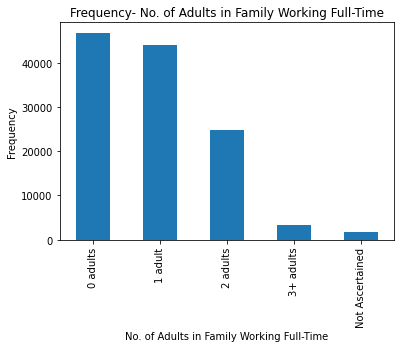

In [25]:
noadults_workingFT_freq = df['PCNTADTWFP_A'].value_counts()
noadults_workingFT_props = df['PCNTADTWFP_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("No. of Adults in Family Working Full-Time Frequencies:\n", noadults_workingFT_freq)
print("\nNo. of Adults in Family Working Full-Time Proportions (%):\n", noadults_workingFT_props)

# Plot bar chart for URBRRL
noadults_workingFT_freq.plot(kind='bar')
plt.title('Frequency- No. of Adults in Family Working Full-Time')
plt.xlabel('No. of Adults in Family Working Full-Time')
plt.ylabel('Frequency')
plt.show()

Income from Wages Frequencies:
 Yes                84928
No                 30839
Not Ascertained     4025
Refused              707
Don't know           199
Name: INCWRKO_A, dtype: int64

Income from Wages Proportions (%):
 Yes                70.364049
No                 25.550548
Not Ascertained     3.334769
Refused             0.585759
Don't know          0.164874
Name: INCWRKO_A, dtype: float64


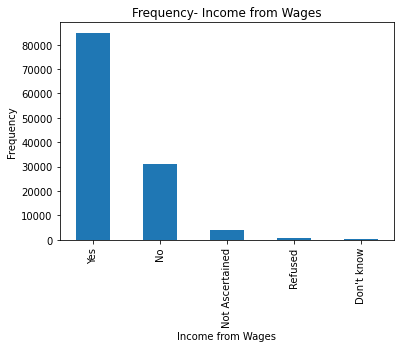

In [26]:
income_wages_freq = df['INCWRKO_A'].value_counts()
income_wages_props = df['INCWRKO_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Income from Wages Frequencies:\n", income_wages_freq)
print("\nIncome from Wages Proportions (%):\n", income_wages_props)

# Plot bar chart for URBRRL
income_wages_freq.plot(kind='bar')
plt.title('Frequency- Income from Wages')
plt.xlabel('Income from Wages')
plt.ylabel('Frequency')
plt.show()

Income from Investments and Other Accounts Frequencies:
 No                 76971
Yes                36888
Not Ascertained     4066
Refused             1758
Don't know          1015
Name: INCINTER_A, dtype: int64

Income from Investments and Other Accounts Proportions (%):
 No                 63.771562
Yes                30.562230
Not Ascertained     3.368739
Refused             1.456528
Don't know          0.840942
Name: INCINTER_A, dtype: float64


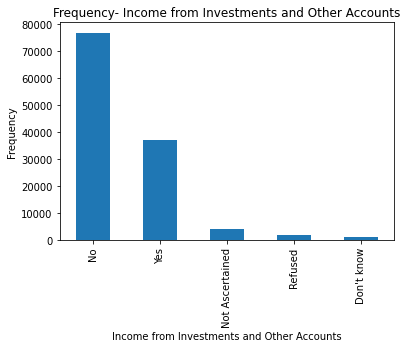

In [27]:
income_invaccounts_freq = df['INCINTER_A'].value_counts()
income_invaccounts_props = df['INCINTER_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Income from Investments and Other Accounts Frequencies:\n", income_invaccounts_freq)
print("\nIncome from Investments and Other Accounts Proportions (%):\n", income_invaccounts_props)

# Plot bar chart for URBRRL
income_invaccounts_freq.plot(kind='bar')
plt.title('Frequency- Income from Investments and Other Accounts')
plt.xlabel('Income from Investments and Other Accounts')
plt.ylabel('Frequency')
plt.show()

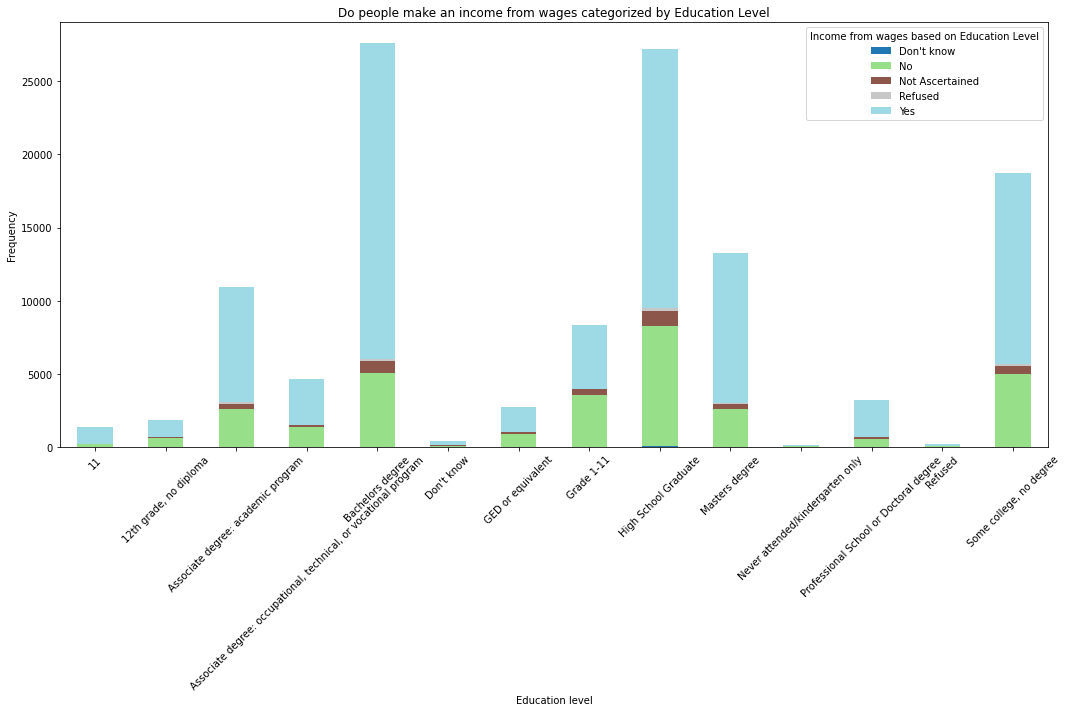

In [159]:
# Create a cross-tabulation
contingency_table_7 = pd.crosstab(df['EDUCP_A'], df['INCWRKO_A'])

# Plot a stacked bar chart
contingency_table_7.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title('Do people make an income from wages categorized by Education Level')
plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Income from wages based on Education Level')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

Income from Social Security/Railroad Retirement Frequencies:
 No                 75050
Yes                40125
Refused              480
Don't know           368
Not Ascertained       47
Name: INCSSRR_A, dtype: int64

Income from Social Security/Railroad Retirement Proportions (%):
 No                 64.659257
Yes                34.569656
Refused             0.413544
Don't know          0.317050
Not Ascertained     0.040493
Name: INCSSRR_A, dtype: float64


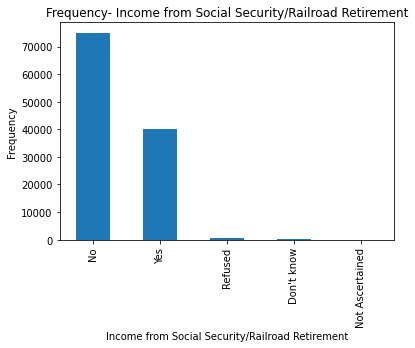

In [28]:
income_ssrr_freq = df['INCSSRR_A'].value_counts()
income_ssrr_props = df['INCSSRR_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Income from Social Security/Railroad Retirement Frequencies:\n", income_ssrr_freq)
print("\nIncome from Social Security/Railroad Retirement Proportions (%):\n", income_ssrr_props)

# Plot bar chart for URBRRL
income_ssrr_freq.plot(kind='bar')
plt.title('Frequency- Income from Social Security/Railroad Retirement')
plt.xlabel('Income from Social Security/Railroad Retirement')
plt.ylabel('Frequency')
plt.show()

Income from Welfare Payments/Public Assistance Frequencies:
 No                 111979
Yes                  3369
Refused               408
Don't know            254
Not Ascertained        60
Name: INCWELF_A, dtype: int64

Income from Welfare Payments/Public Assistance Proportions (%):
 No                 96.475403
Yes                 2.902559
Refused             0.351512
Don't know          0.218833
Not Ascertained     0.051693
Name: INCWELF_A, dtype: float64


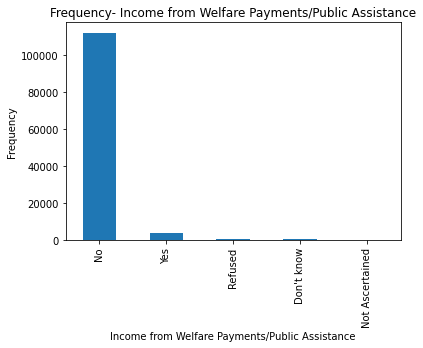

In [29]:
income_pubass_freq = df['INCWELF_A'].value_counts()
income_pubass_props = df['INCWELF_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Income from Welfare Payments/Public Assistance Frequencies:\n", income_pubass_freq)
print("\nIncome from Welfare Payments/Public Assistance Proportions (%):\n", income_pubass_props)

# Plot bar chart for URBRRL
income_pubass_freq.plot(kind='bar')
plt.title('Frequency- Income from Welfare Payments/Public Assistance')
plt.xlabel('Income from Welfare Payments/Public Assistance')
plt.ylabel('Frequency')
plt.show()

Income from Retirement/Disability Pensions Frequencies:
 No                 111979
Yes                  3369
Refused               408
Don't know            254
Not Ascertained        60
Name: INCWELF_A, dtype: int64

Income from Retirement/Disability Pensions Proportions (%):
 No                 96.475403
Yes                 2.902559
Refused             0.351512
Don't know          0.218833
Not Ascertained     0.051693
Name: INCWELF_A, dtype: float64


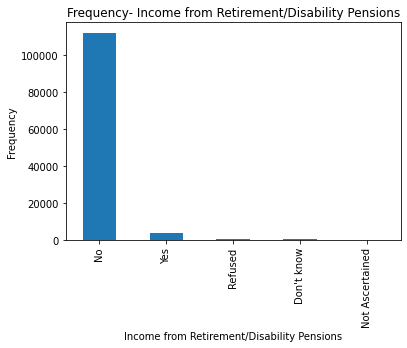

In [30]:
income_retpensions_freq = df['INCWELF_A'].value_counts()
income_retpensions_props = df['INCWELF_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Income from Retirement/Disability Pensions Frequencies:\n", income_retpensions_freq)
print("\nIncome from Retirement/Disability Pensions Proportions (%):\n", income_retpensions_props)

# Plot bar chart for URBRRL
income_retpensions_freq.plot(kind='bar')
plt.title('Frequency- Income from Retirement/Disability Pensions')
plt.xlabel('Income from Retirement/Disability Pensions')
plt.ylabel('Frequency')
plt.show()

Income from other sources (Child support, Alimony) Frequencies:
 No                 103310
Yes                 11916
Refused               501
Don't Know            269
Not Ascertained        74
Name: INCOTHR_A, dtype: int64

Income from other sources (Child support, Alimony) Proportions (%):
 No                 89.006634
Yes                10.266219
Refused             0.431636
Don't Know          0.231757
Not Ascertained     0.063755
Name: INCOTHR_A, dtype: float64


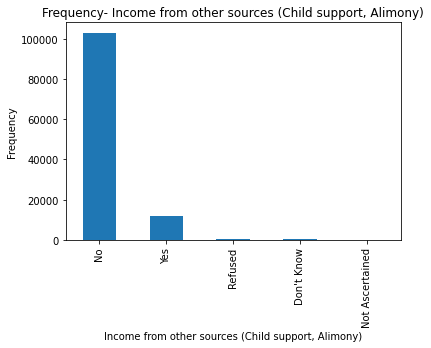

In [31]:
income_othsources_freq = df['INCOTHR_A'].value_counts()
income_othsources_props = df['INCOTHR_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Income from other sources (Child support, Alimony) Frequencies:\n", income_othsources_freq)
print("\nIncome from other sources (Child support, Alimony) Proportions (%):\n", income_othsources_props)

# Plot bar chart for URBRRL
income_othsources_freq.plot(kind='bar')
plt.title('Frequency- Income from other sources (Child support, Alimony)')
plt.xlabel('Income from other sources (Child support, Alimony)')
plt.ylabel('Frequency')
plt.show()

Ratio of Family Income to Poverty Threshold Frequencies:
 5.00 or greater    38691
2.00 - 2.49        10163
2.50 - 2.99         9143
3.50 - 3.99         8151
3.00 - 3.49         7969
4.50 - 4.99         6858
4.00 - 4.49         6701
1.75 - 1.99         5789
1.25 - 1.49         5724
0.75 - 0.99         5477
1.00 - 1.24         4782
1.50 - 1.74         4680
0.50 - 0.74         3404
0.00 - 0.49         3166
Name: RATCAT_A, dtype: int64

Ratio of Family Income to Poverty Threshold Proportions (%):
 5.00 or greater    32.056041
2.00 - 2.49         8.420189
2.50 - 2.99         7.575105
3.50 - 3.99         6.753219
3.00 - 3.49         6.602429
4.50 - 4.99         5.681950
4.00 - 4.49         5.551873
1.75 - 1.99         4.796268
1.25 - 1.49         4.742415
0.75 - 0.99         4.537772
1.00 - 1.24         3.961955
1.50 - 1.74         3.877446
0.50 - 0.74         2.820262
0.00 - 0.49         2.623076
Name: RATCAT_A, dtype: float64


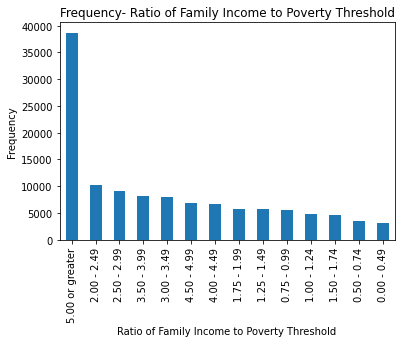

In [32]:
ratio_famincpov_freq = df['RATCAT_A'].value_counts()
ratio_famincpov_props = df['RATCAT_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ratio of Family Income to Poverty Threshold Frequencies:\n", ratio_famincpov_freq)
print("\nRatio of Family Income to Poverty Threshold Proportions (%):\n", ratio_famincpov_props)

# Plot bar chart for URBRRL
ratio_famincpov_freq.plot(kind='bar')
plt.title('Frequency- Ratio of Family Income to Poverty Threshold')
plt.xlabel('Ratio of Family Income to Poverty Threshold')
plt.ylabel('Frequency')
plt.show()

Health Insurance Coverage Frequencies:
 Covered        110657
Not Covered      9700
Don't Know        341
Name: NOTCOV_A, dtype: int64

Health Insurance Coverage Proportions (%):
 Covered        91.680889
Not Covered     8.036587
Don't Know      0.282523
Name: NOTCOV_A, dtype: float64


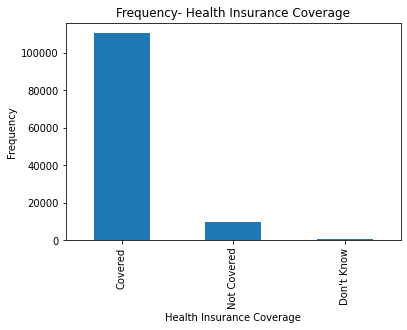

In [33]:
healthins_coverage_freq = df['NOTCOV_A'].value_counts()
healthins_coverage_props = df['NOTCOV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Health Insurance Coverage Frequencies:\n", healthins_coverage_freq)
print("\nHealth Insurance Coverage Proportions (%):\n", healthins_coverage_props)

# Plot bar chart for URBRRL
healthins_coverage_freq.plot(kind='bar')
plt.title('Frequency- Health Insurance Coverage')
plt.xlabel('Health Insurance Coverage')
plt.ylabel('Frequency')
plt.show()

Type of Health Insurance Coverage (under 65) Frequencies:
 Private                      58414
Medicaid and other public    11069
Uninsured                     9516
Other Coverage                4339
Don't Know                     279
Name: COVER_A, dtype: int64

Type of Health Insurance Coverage (under 65) Proportions (%):
 Private                      69.859000
Medicaid and other public    13.237739
Uninsured                    11.380461
Other Coverage                5.189136
Don't Know                    0.333664
Name: COVER_A, dtype: float64


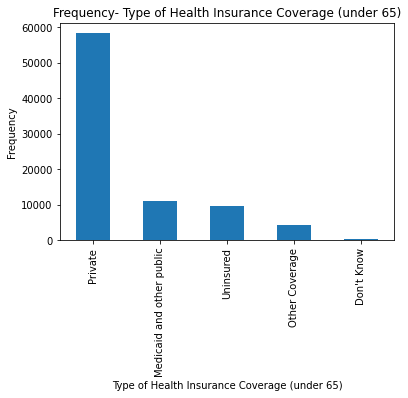

In [34]:
type_healthins_under65_freq = df['COVER_A'].value_counts()
type_healthins_under65_props = df['COVER_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Type of Health Insurance Coverage (under 65) Frequencies:\n", type_healthins_under65_freq)
print("\nType of Health Insurance Coverage (under 65) Proportions (%):\n", type_healthins_under65_props)

# Plot bar chart for URBRRL
type_healthins_under65_freq.plot(kind='bar')
plt.title('Frequency- Type of Health Insurance Coverage (under 65)')
plt.xlabel('Type of Health Insurance Coverage (under 65)')
plt.ylabel('Frequency')
plt.show()

Type of Health Insurance Coverage (over 65) Frequencies:
 Private                                       14775
Medicare Advantage                            11898
Medicare only excluding Medicare Advantage     4519
Other Coverage                                 3130
Dual Eligible                                  2450
Uninsured                                       184
Don't Know                                      123
Name: COVER65_A, dtype: int64

Type of Health Insurance Coverage (over 65) Proportions (%):
 Private                                       39.847353
Medicare Advantage                            32.088244
Medicare only excluding Medicare Advantage    12.187492
Other Coverage                                 8.441436
Dual Eligible                                  6.607514
Uninsured                                      0.496238
Don't Know                                     0.331724
Name: COVER65_A, dtype: float64


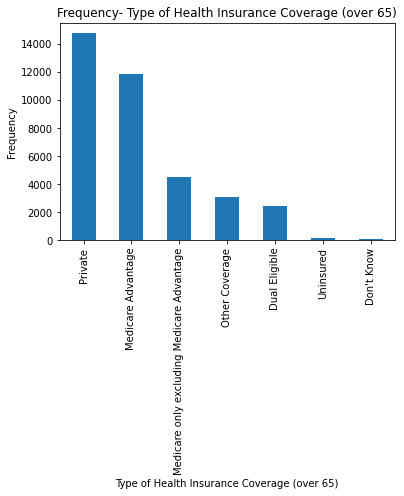

In [35]:
type_healthins_over65_freq = df['COVER65_A'].value_counts()
type_healthins_over65_props = df['COVER65_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Type of Health Insurance Coverage (over 65) Frequencies:\n", type_healthins_over65_freq)
print("\nType of Health Insurance Coverage (over 65) Proportions (%):\n", type_healthins_over65_props)

# Plot bar chart for URBRRL
type_healthins_over65_freq.plot(kind='bar')
plt.title('Frequency- Type of Health Insurance Coverage (over 65)')
plt.xlabel('Type of Health Insurance Coverage (over 65)')
plt.ylabel('Frequency')
plt.show()

Separate Plan (Dental Services) Frequencies:
 No            75102
Yes           44329
Don't know     1123
Refused         144
Name: SINCOVDE_A, dtype: int64

Separate Plan (Dental Services) Proportions (%):
 No            62.223069
Yes           36.727203
Don't know     0.930421
Refused        0.119306
Name: SINCOVDE_A, dtype: float64


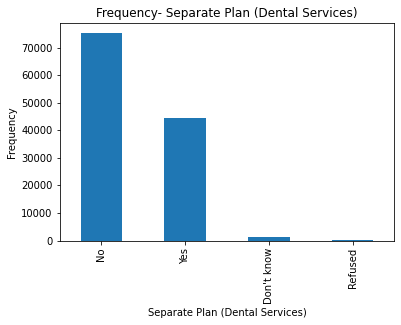

In [36]:
sepplan_dental_freq = df['SINCOVDE_A'].value_counts()
sepplan_dental_props = df['SINCOVDE_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Separate Plan (Dental Services) Frequencies:\n", sepplan_dental_freq)
print("\nSeparate Plan (Dental Services) Proportions (%):\n", sepplan_dental_props)

# Plot bar chart for URBRRL
sepplan_dental_freq.plot(kind='bar')
plt.title('Frequency- Separate Plan (Dental Services)')
plt.xlabel('Separate Plan (Dental Services)')
plt.ylabel('Frequency')
plt.show()

Separate Plan (vision Services) Frequencies:
 No            86715
Yes           32466
Don't know     1368
Refused         149
Name: SINCOVVS_A, dtype: int64

Separate Plan (vision Services) Proportions (%):
 No            71.844604
Yes           26.898540
Don't know     1.133407
Refused        0.123449
Name: SINCOVVS_A, dtype: float64


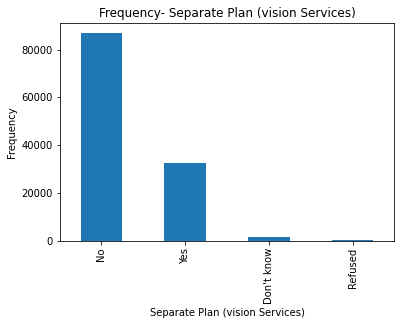

In [37]:
sepplan_vision_freq = df['SINCOVVS_A'].value_counts()
sepplan_vision_props = df['SINCOVVS_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Separate Plan (vision Services) Frequencies:\n", sepplan_vision_freq)
print("\nSeparate Plan (vision Services) Proportions (%):\n", sepplan_vision_props)

# Plot bar chart for URBRRL
sepplan_vision_freq.plot(kind='bar')
plt.title('Frequency- Separate Plan (vision Services)')
plt.xlabel('Separate Plan (vision Services)')
plt.ylabel('Frequency')
plt.show()

Separate Plan (Prescription) Frequencies:
 No            100281
Yes            19027
Don't know      1242
Refused          148
Name: SINCOVRX_A, dtype: int64

Separate Plan (Prescription) Proportions (%):
 No            83.084227
Yes           15.764139
Don't know     1.029015
Refused        0.122620
Name: SINCOVRX_A, dtype: float64


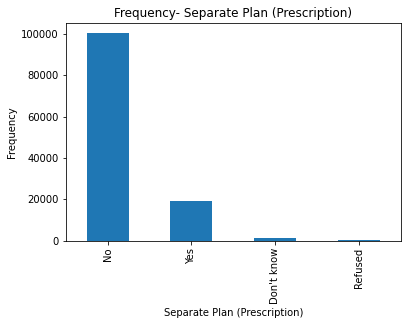

In [38]:
sepplan_presc_freq = df['SINCOVRX_A'].value_counts()
sepplan_presc_props = df['SINCOVRX_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Separate Plan (Prescription) Frequencies:\n", sepplan_presc_freq)
print("\nSeparate Plan (Prescription) Proportions (%):\n", sepplan_presc_props)

# Plot bar chart for URBRRL
sepplan_presc_freq.plot(kind='bar')
plt.title('Frequency- Separate Plan (Prescription)')
plt.xlabel('Separate Plan (Prescription)')
plt.ylabel('Frequency')
plt.show()

Do you have Medicare? Frequencies:
 No                         81134
Yes, information           39115
Don't know                   185
Refused                      176
Yes, but no information       84
Not Ascertained                4
Name: MEDICARE_A, dtype: int64

Do you have Medicare? Proportions (%):
 No                         67.220666
Yes, information           32.407331
Don't know                  0.153275
Refused                     0.145818
Yes, but no information     0.069595
Not Ascertained             0.003314
Name: MEDICARE_A, dtype: float64


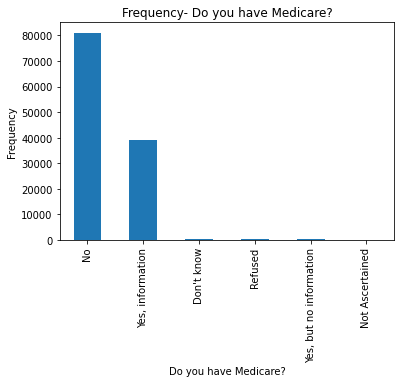

In [39]:
medicare_freq = df['MEDICARE_A'].value_counts()
medicare_props = df['MEDICARE_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Do you have Medicare? Frequencies:\n", medicare_freq)
print("\nDo you have Medicare? Proportions (%):\n", medicare_props)

# Plot bar chart for URBRRL
medicare_freq.plot(kind='bar')
plt.title('Frequency- Do you have Medicare?')
plt.xlabel('Do you have Medicare?')
plt.ylabel('Frequency')
plt.show()

Medicare Coverage Type Frequencies:
 Both Part A and B         35742
Part A - hospital only     1941
Don't know                  769
Part B - medical only       581
Not Ascertained             138
Refused                      28
Name: MCPART_A, dtype: int64

Medicare Coverage Type Proportions (%):
 Both Part A and B         91.180897
Part A - hospital only     4.951657
Don't know                 1.961785
Part B - medical only      1.482181
Not Ascertained            0.352050
Refused                    0.071430
Name: MCPART_A, dtype: float64


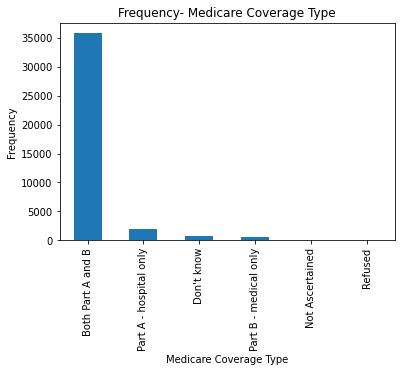

In [40]:
medicare_covtype_freq = df['MCPART_A'].value_counts()
medicare_covtype_props = df['MCPART_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Medicare Coverage Type Frequencies:\n", medicare_covtype_freq)
print("\nMedicare Coverage Type Proportions (%):\n", medicare_covtype_props)

# Plot bar chart for URBRRL
medicare_covtype_freq.plot(kind='bar')
plt.title('Frequency- Medicare Coverage Type')
plt.xlabel('Medicare Coverage Type')
plt.ylabel('Frequency')
plt.show()

Medicare Advanatge Plan? Frequencies:
 No                 22025
Yes                12890
Don't know          2220
Not Ascertained       84
Refused               39
Name: MCCHOICE_A, dtype: int64

Medicare Advanatge Plan? Proportions (%):
 No                 59.114821
Yes                34.596597
Don't know          5.958452
Not Ascertained     0.225455
Refused             0.104676
Name: MCCHOICE_A, dtype: float64


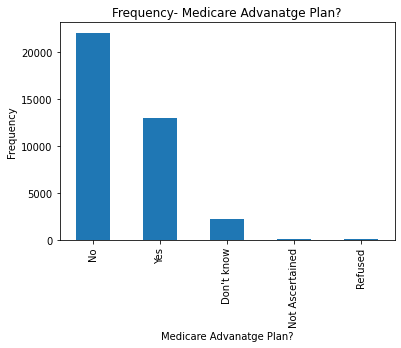

In [41]:
medicare_adv_freq = df['MCCHOICE_A'].value_counts()
medicare_adv_props = df['MCCHOICE_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Medicare Advanatge Plan? Frequencies:\n", medicare_adv_freq)
print("\nMedicare Advanatge Plan? Proportions (%):\n", medicare_adv_props)

# Plot bar chart for URBRRL
medicare_adv_freq.plot(kind='bar')
plt.title('Frequency- Medicare Advanatge Plan?')
plt.xlabel('Medicare Advanatge Plan?')
plt.ylabel('Frequency')
plt.show()

Medicare Part D? Frequencies:
 No                 18730
Yes                18556
Don't know          1752
Not Ascertained      122
Refused               39
Name: MCPARTD_A, dtype: int64

Medicare Part D? Proportions (%):
 No                 47.781831
Yes                47.337942
Don't know          4.469502
Not Ascertained     0.311232
Refused             0.099492
Name: MCPARTD_A, dtype: float64


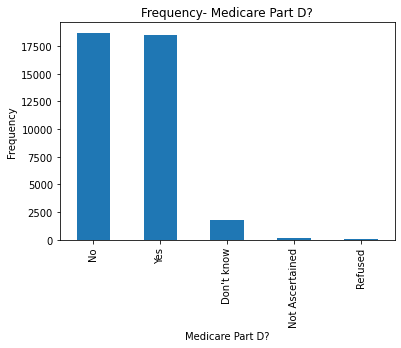

In [42]:
medicare_partd_freq = df['MCPARTD_A'].value_counts()
medicare_partd_props = df['MCPARTD_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Medicare Part D? Frequencies:\n", medicare_partd_freq)
print("\nMedicare Part D? Proportions (%):\n", medicare_partd_props)

# Plot bar chart for URBRRL
medicare_partd_freq.plot(kind='bar')
plt.title('Frequency- Medicare Part D?')
plt.xlabel('Medicare Part D?')
plt.ylabel('Frequency')
plt.show()

Do you have Medicaid? Frequencies:
 No                         106802
Yes, information            13515
Refused                       151
Don't know                    130
Yes, but no information       100
Name: MEDICAID_A, dtype: int64

Do you have Medicaid? Proportions (%):
 No                         88.486967
Yes, information           11.197369
Refused                     0.125106
Don't know                  0.107707
Yes, but no information     0.082851
Name: MEDICAID_A, dtype: float64


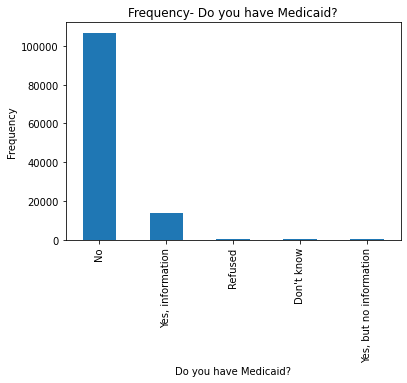

In [43]:
medicaid_freq = df['MEDICAID_A'].value_counts()
medicaid_props = df['MEDICAID_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Do you have Medicaid? Frequencies:\n", medicaid_freq)
print("\nDo you have Medicaid? Proportions (%):\n", medicaid_props)

# Plot bar chart for URBRRL
medicaid_freq.plot(kind='bar')
plt.title('Frequency- Do you have Medicaid?')
plt.xlabel('Do you have Medicaid?')
plt.ylabel('Frequency')
plt.show()

Do you have Private Insurance? Frequencies:
 Yes, information           76837
No                         43425
Don't know                   223
Refused                      207
Yes, but no information        6
Name: PRIVATE_A, dtype: int64

Do you have Private Insurance? Proportions (%):
 Yes, information           63.660541
No                         35.978227
Don't know                  0.184759
Refused                     0.171502
Yes, but no information     0.004971
Name: PRIVATE_A, dtype: float64


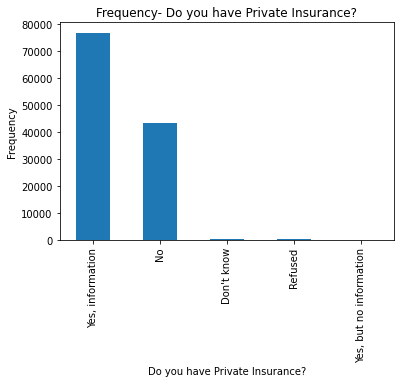

In [44]:
private_ins_freq = df['PRIVATE_A'].value_counts()
private_ins_props = df['PRIVATE_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Do you have Private Insurance? Frequencies:\n", private_ins_freq)
print("\nDo you have Private Insurance? Proportions (%):\n", private_ins_props)

# Plot bar chart for URBRRL
private_ins_freq.plot(kind='bar')
plt.title('Frequency- Do you have Private Insurance?')
plt.xlabel('Do you have Private Insurance?')
plt.ylabel('Frequency')
plt.show()

How was Private Insurance obtained? Frequencies:
 Through an employer, union, or professional organization                      58506
Purchased directly                                                            12444
Through Healthcare.gov or the Affordable Care Act, also known as Obamacare     2239
Not Ascertained                                                                1802
Through a state or local government or community program                       1058
Don't Know                                                                      380
Other                                                                           168
Through school                                                                  128
Refused                                                                          71
Through parents                                                                  47
Name: PLNWRKR1_A, dtype: int64

How was Private Insurance obtained? Proportions (%):
 Through an employer, uni

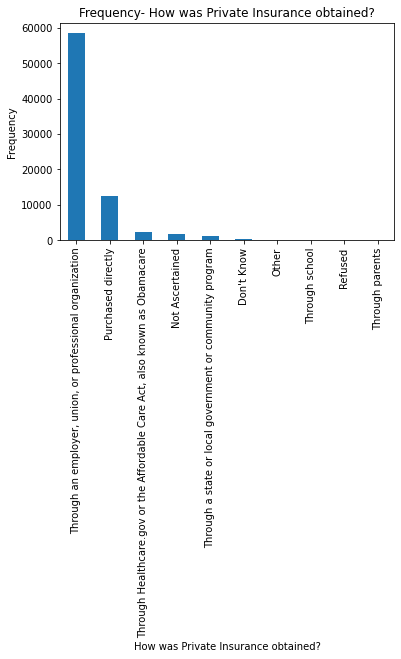

In [45]:
private_inshow_freq = df['PLNWRKR1_A'].value_counts()
private_inshow_props = df['PLNWRKR1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("How was Private Insurance obtained? Frequencies:\n", private_inshow_freq)
print("\nHow was Private Insurance obtained? Proportions (%):\n", private_inshow_props)

# Plot bar chart for URBRRL
private_inshow_freq.plot(kind='bar')
plt.title('Frequency- How was Private Insurance obtained?')
plt.xlabel('How was Private Insurance obtained?')
plt.ylabel('Frequency')
plt.show()

Does Private Insurance have deductible? Frequencies:
 Yes                52330
No                 18056
Don't Know          6237
Refused              211
Not Ascertained        9
Name: PRDEDUC1_A, dtype: int64

Does Private Insurance have deductible? Proportions (%):
 Yes                68.099892
No                 23.497261
Don't Know          8.116549
Refused             0.274586
Not Ascertained     0.011712
Name: PRDEDUC1_A, dtype: float64


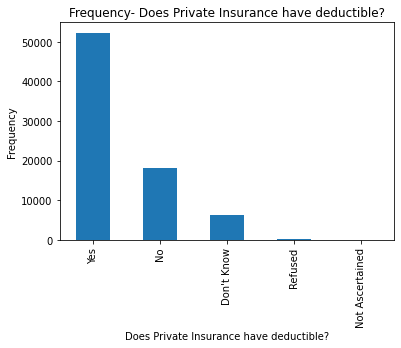

In [46]:
private_insdeduc_freq = df['PRDEDUC1_A'].value_counts()
private_insdeduc_props = df['PRDEDUC1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Does Private Insurance have deductible? Frequencies:\n", private_insdeduc_freq)
print("\nDoes Private Insurance have deductible? Proportions (%):\n", private_insdeduc_props)

# Plot bar chart for URBRRL
private_insdeduc_freq.plot(kind='bar')
plt.title('Frequency- Does Private Insurance have deductible?')
plt.xlabel('Does Private Insurance have deductible?')
plt.ylabel('Frequency')
plt.show()

Does Private Insurance cover medication costs prescribed by doctor? Frequencies:
 Yes                62860
No                  9653
Not Ascertained     2200
Don't Know          2046
Refused               84
Name: PRRXCOV1_A, dtype: int64

Does Private Insurance cover medication costs prescribed by doctor? Proportions (%):
 Yes                81.803157
No                 12.561977
Not Ascertained     2.862980
Don't Know          2.662572
Refused             0.109314
Name: PRRXCOV1_A, dtype: float64


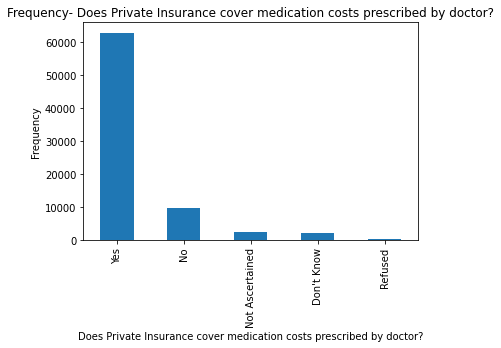

In [47]:
private_mediccosts_freq = df['PRRXCOV1_A'].value_counts()
private_mediccosts_props = df['PRRXCOV1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Does Private Insurance cover medication costs prescribed by doctor? Frequencies:\n", private_mediccosts_freq)
print("\nDoes Private Insurance cover medication costs prescribed by doctor? Proportions (%):\n", private_mediccosts_props)

# Plot bar chart for URBRRL
private_mediccosts_freq.plot(kind='bar')
plt.title('Frequency- Does Private Insurance cover medication costs prescribed by doctor?')
plt.xlabel('Does Private Insurance cover medication costs prescribed by doctor?')
plt.ylabel('Frequency')
plt.show()

Does Private Insurance cover any costs for dental care? Frequencies:
 No                 45556
Yes                27030
Not Ascertained     2198
Don't Know          1965
Refused               94
Name: PRDNCOV1_A, dtype: int64

Does Private Insurance cover any costs for dental care? Proportions (%):
 No                 59.284515
Yes                35.175618
Not Ascertained     2.860378
Don't Know          2.557162
Refused             0.122327
Name: PRDNCOV1_A, dtype: float64


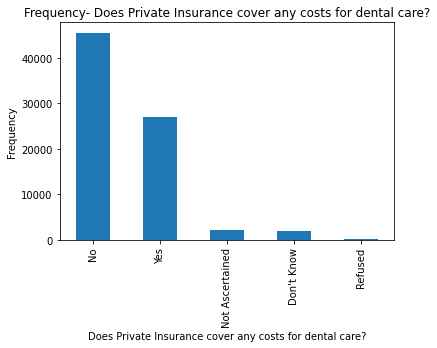

In [48]:
private_dentalcare_freq = df['PRDNCOV1_A'].value_counts()
private_dentalcare_props = df['PRDNCOV1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Does Private Insurance cover any costs for dental care? Frequencies:\n", private_dentalcare_freq)
print("\nDoes Private Insurance cover any costs for dental care? Proportions (%):\n", private_dentalcare_props)

# Plot bar chart for URBRRL
private_dentalcare_freq.plot(kind='bar')
plt.title('Frequency- Does Private Insurance cover any costs for dental care?')
plt.xlabel('Does Private Insurance cover any costs for dental care?')
plt.ylabel('Frequency')
plt.show()

Does Private Insurance cover any costs for vision care? Frequencies:
 No                 40879
Yes                30900
Don't Know          2764
Not Ascertained     2198
Refused              102
Name: PRVSCOV1_A, dtype: int64

Does Private Insurance cover any costs for vision care? Proportions (%):
 No                 53.198079
Yes                40.211861
Don't Know          3.596944
Not Ascertained     2.860378
Refused             0.132738
Name: PRVSCOV1_A, dtype: float64


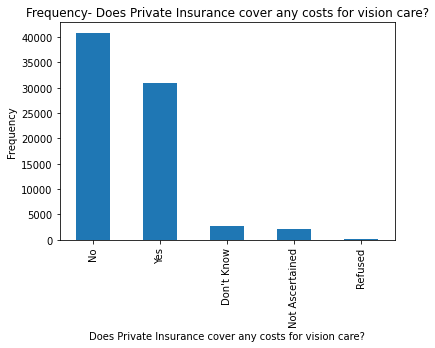

In [49]:
private_visioncare_freq = df['PRVSCOV1_A'].value_counts()
private_visioncare_props = df['PRVSCOV1_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Does Private Insurance cover any costs for vision care? Frequencies:\n", private_visioncare_freq)
print("\nDoes Private Insurance cover any costs for vision care? Proportions (%):\n", private_visioncare_props)

# Plot bar chart for URBRRL
private_visioncare_freq.plot(kind='bar')
plt.title('Frequency- Does Private Insurance cover any costs for vision care?')
plt.xlabel('Does Private Insurance cover any costs for vision care?')
plt.ylabel('Frequency')
plt.show()

Do you have CHIP? Frequencies:
 No                  120231
Don't know             223
Refused                207
Yes, information        37
Name: CHIP_A, dtype: int64

Do you have CHIP? Proportions (%):
 No                  99.613084
Don't know           0.184759
Refused              0.171502
Yes, information     0.030655
Name: CHIP_A, dtype: float64


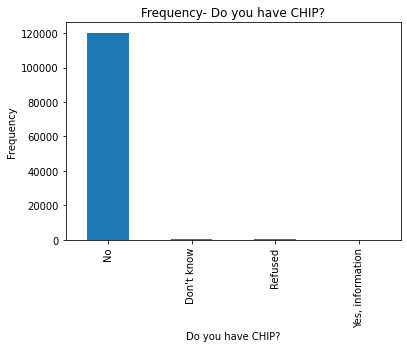

In [50]:
chip_freq = df['CHIP_A'].value_counts()
chip_props = df['CHIP_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Do you have CHIP? Frequencies:\n", chip_freq)
print("\nDo you have CHIP? Proportions (%):\n", chip_props)

# Plot bar chart for URBRRL
chip_freq.plot(kind='bar')
plt.title('Frequency- Do you have CHIP?')
plt.xlabel('Do you have CHIP?')
plt.ylabel('Frequency')
plt.show()

Do you have other state sponsored plan? Frequencies:
 No                  119575
Yes, information       693
Don't know             223
Refused                207
Name: OTHPUB_A, dtype: int64

Do you have other state sponsored plan? Proportions (%):
 No                  99.069579
Yes, information     0.574160
Don't know           0.184759
Refused              0.171502
Name: OTHPUB_A, dtype: float64


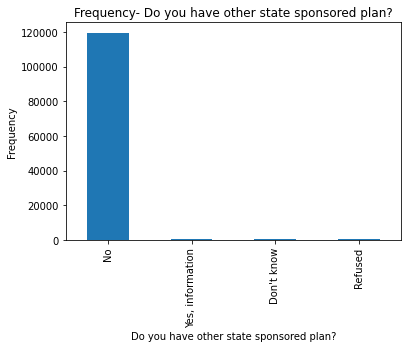

In [51]:
other_stateplan_freq = df['OTHPUB_A'].value_counts()
other_stateplan_props = df['OTHPUB_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Do you have other state sponsored plan? Frequencies:\n", other_stateplan_freq)
print("\nDo you have other state sponsored plan? Proportions (%):\n", other_stateplan_props)

# Plot bar chart for URBRRL
other_stateplan_freq.plot(kind='bar')
plt.title('Frequency- Do you have other state sponsored plan?')
plt.xlabel('Do you have other state sponsored plan?')
plt.ylabel('Frequency')
plt.show()

Do you have other government program? Frequencies:
 No                  120012
Yes, information       256
Don't know             223
Refused                207
Name: OTHGOV_A, dtype: int64

Do you have other government program? Proportions (%):
 No                  99.431639
Yes, information     0.212100
Don't know           0.184759
Refused              0.171502
Name: OTHGOV_A, dtype: float64


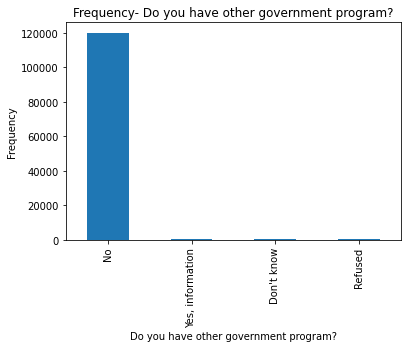

In [52]:
other_gov_freq = df['OTHGOV_A'].value_counts()
other_gov_props = df['OTHGOV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Do you have other government program? Frequencies:\n", other_gov_freq)
print("\nDo you have other government program? Proportions (%):\n", other_gov_props)

# Plot bar chart for URBRRL
other_gov_freq.plot(kind='bar')
plt.title('Frequency- Do you have other government program?')
plt.xlabel('Do you have other government program?')
plt.ylabel('Frequency')
plt.show()

Do you have health insurance through the military? Frequencies:
 No                         112690
Yes, information             7588
Don't know                    220
Refused                       199
Yes, but no information         1
Name: MILITARY_A, dtype: int64

Do you have health insurance through the military? Proportions (%):
 No                         93.365259
Yes, information            6.286765
Don't know                  0.182273
Refused                     0.164874
Yes, but no information     0.000829
Name: MILITARY_A, dtype: float64


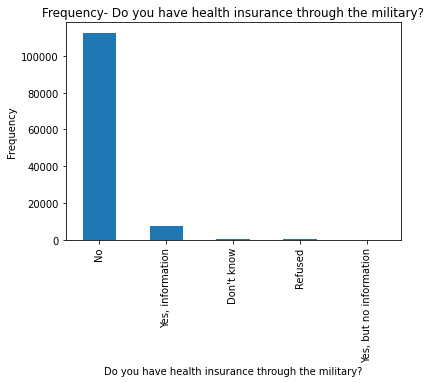

In [53]:
military_plan_freq = df['MILITARY_A'].value_counts()
military_plan_props = df['MILITARY_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Do you have health insurance through the military? Frequencies:\n", military_plan_freq)
print("\nDo you have health insurance through the military? Proportions (%):\n", military_plan_props)

# Plot bar chart for URBRRL
military_plan_freq.plot(kind='bar')
plt.title('Frequency- Do you have health insurance through the military?')
plt.xlabel('Do you have health insurance through the military?')
plt.ylabel('Frequency')
plt.show()

Do you have health insurance through Indian Health Service? Frequencies:
 No            119786
Yes              482
Don't Know       223
Refused          207
Name: IHS_A, dtype: int64

Do you have health insurance through Indian Health Service? Proportions (%):
 No            99.244395
Yes            0.399344
Don't Know     0.184759
Refused        0.171502
Name: IHS_A, dtype: float64


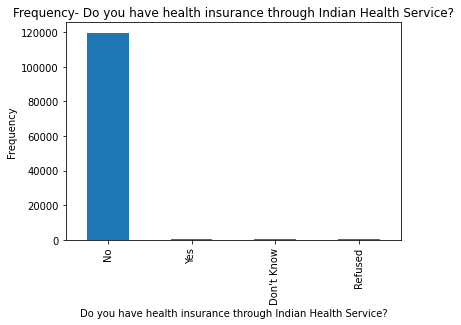

In [54]:
ihs_plan_freq = df['IHS_A'].value_counts()
ihs_plan_props = df['IHS_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Do you have health insurance through Indian Health Service? Frequencies:\n", ihs_plan_freq)
print("\nDo you have health insurance through Indian Health Service? Proportions (%):\n", ihs_plan_props)

# Plot bar chart for URBRRL
ihs_plan_freq.plot(kind='bar')
plt.title('Frequency- Do you have health insurance through Indian Health Service?')
plt.xlabel('Do you have health insurance through Indian Health Service?')
plt.ylabel('Frequency')
plt.show()

How long since health insurance paid for doctor's visit? Frequencies:
 Within the past year (anytime less than 12 months ago)           2528
Within the last 2 years (1 year but less than 2 years ago)       1337
Never                                                            1237
10 years ago or more                                             1138
Within the last 5 years (3 years but less than 5 years ago)       922
Within the last 10 years (5 years but less than 10 years ago)     820
Within the last 3 years (2 years but less than 3 years ago)       797
Not Ascertained                                                   690
Don't Know                                                         73
Refused                                                            12
Name: HILAST_A, dtype: int64

How long since health insurance paid for doctor's visit? Proportions (%):
 Within the past year (anytime less than 12 months ago)           26.460121
Within the last 2 years (1 year but less than 2 y

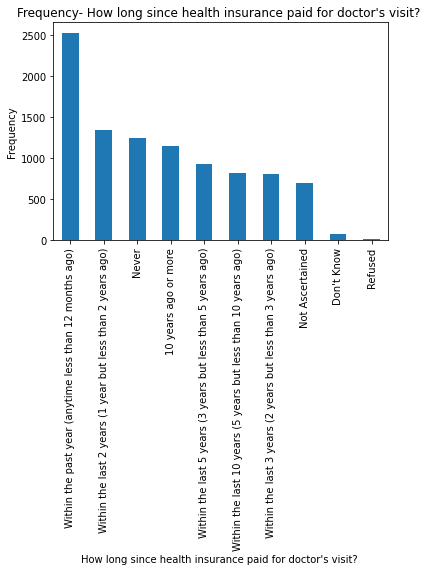

In [55]:
time_sinceinspaid_freq = df['HILAST_A'].value_counts()
time_sinceinspaid_props = df['HILAST_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("How long since health insurance paid for doctor's visit? Frequencies:\n", time_sinceinspaid_freq)
print("\nHow long since health insurance paid for doctor's visit? Proportions (%):\n", time_sinceinspaid_props)

# Plot bar chart for URBRRL
time_sinceinspaid_freq.plot(kind='bar')
plt.title("Frequency- How long since health insurance paid for doctor's visit? ")
plt.xlabel("How long since health insurance paid for doctor's visit? ")
plt.ylabel('Frequency')
plt.show()

Past 12 m, how many months without coverage? Frequencies:
 1             243
12            207
6             186
1.0           185
2             161
12.0          142
3             141
4             120
6.0           115
2.0           109
3.0            94
7              80
5              78
4.0            75
10             69
11             66
8.0            61
8              59
9              58
10.0           55
5.0            55
7.0            50
9.0            48
11.0           43
Don't Know     27
Refused         1
Name: HILASTMY_A, dtype: int64

Past 12 m, how many months without coverage? Proportions (%):
 1             9.612342
12            8.188291
6             7.357595
1.0           7.318038
2             6.368671
12.0          5.617089
3             5.577532
4             4.746835
6.0           4.549051
2.0           4.311709
3.0           3.718354
7             3.164557
5             3.085443
4.0           2.966772
10            2.729430
11            2.610759
8.0       

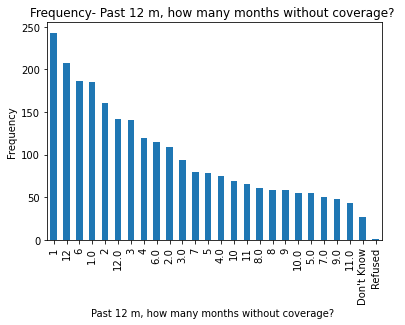

In [56]:
months_without_cov_freq = df['HILASTMY_A'].value_counts()
months_without_cov_props = df['HILASTMY_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12 m, how many months without coverage? Frequencies:\n", months_without_cov_freq)
print("\nPast 12 m, how many months without coverage? Proportions (%):\n", months_without_cov_props)

# Plot bar chart for URBRRL
months_without_cov_freq.plot(kind='bar')
plt.title("Frequency- Past 12 m, how many months without coverage? ")
plt.xlabel("Past 12 m, how many months without coverage? ")
plt.ylabel('Frequency')
plt.show()

Currently uninsured because coverage not affordable? Frequencies:
 Yes                6252
No                 2536
Not Ascertained     690
Don't Know           68
Refused               8
Name: RSNHICOST_A, dtype: int64

Currently uninsured because coverage not affordable? Proportions (%):
 Yes                65.438560
No                 26.543856
Not Ascertained     7.222106
Don't Know          0.711744
Refused             0.083735
Name: RSNHICOST_A, dtype: float64


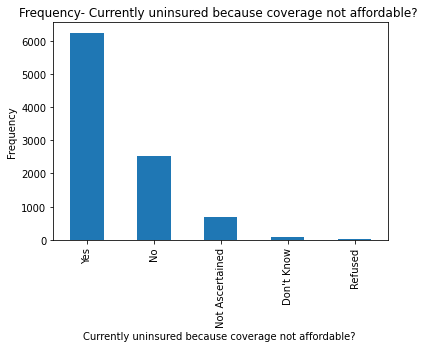

In [57]:
unins_notaffordable_freq = df['RSNHICOST_A'].value_counts()
unins_notaffordable_props = df['RSNHICOST_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Currently uninsured because coverage not affordable? Frequencies:\n", unins_notaffordable_freq)
print("\nCurrently uninsured because coverage not affordable? Proportions (%):\n", unins_notaffordable_props)

# Plot bar chart for URBRRL
unins_notaffordable_freq.plot(kind='bar')
plt.title("Frequency- Currently uninsured because coverage not affordable? ")
plt.xlabel("Currently uninsured because coverage not affordable? ")
plt.ylabel('Frequency')
plt.show()

Currently uninsured because dont want or need coverage? Frequencies:
 No                 6843
Yes                1985
Not Ascertained     690
Don't Know           30
Refused               6
Name: RSNHIWANT_A, dtype: int64

Currently uninsured because dont want or need coverage? Proportions (%):
 No                 71.624450
Yes                20.776638
Not Ascertained     7.222106
Don't Know          0.314005
Refused             0.062801
Name: RSNHIWANT_A, dtype: float64


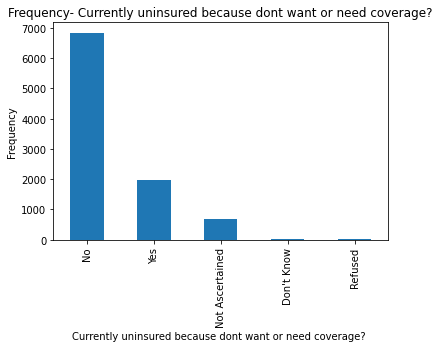

In [58]:
unins_dontneedwant_freq = df['RSNHIWANT_A'].value_counts()
unins_dontneedwant_props = df['RSNHIWANT_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Currently uninsured because dont want or need coverage? Frequencies:\n", unins_dontneedwant_freq)
print("\nCurrently uninsured because dont want or need coverage? Proportions (%):\n", unins_dontneedwant_props)

# Plot bar chart for URBRRL
unins_dontneedwant_freq.plot(kind='bar')
plt.title("Frequency- Currently uninsured because dont want or need coverage?")
plt.xlabel("Currently uninsured because dont want or need coverage? ")
plt.ylabel('Frequency')
plt.show()

Currently uninsured because not eligible for coverage? Frequencies:
 No                 6339
Yes                2245
Not Ascertained     690
Don't Know          270
Refused              10
Name: RSNHIELIG_A, dtype: int64

Currently uninsured because not eligible for coverage? Proportions (%):
 No                 66.349173
Yes                23.498011
Not Ascertained     7.222106
Don't Know          2.826041
Refused             0.104668
Name: RSNHIELIG_A, dtype: float64


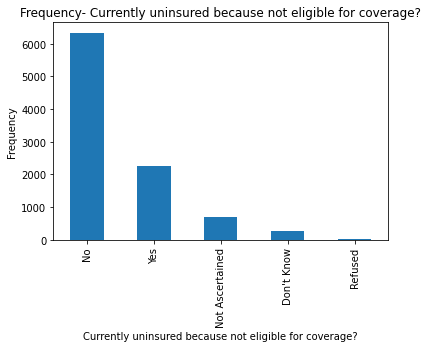

In [59]:
unins_notelig_freq = df['RSNHIELIG_A'].value_counts()
unins_notelig_props = df['RSNHIELIG_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Currently uninsured because not eligible for coverage? Frequencies:\n", unins_notelig_freq)
print("\nCurrently uninsured because not eligible for coverage? Proportions (%):\n", unins_notelig_props)

# Plot bar chart for URBRRL
unins_notelig_freq.plot(kind='bar')
plt.title("Frequency- Currently uninsured because not eligible for coverage?")
plt.xlabel("Currently uninsured because not eligible for coverage?")
plt.ylabel('Frequency')
plt.show()

Currently uninsured because signing up too difficult or confusing? Frequencies:
 No                 7227
Yes                1539
Not Ascertained     690
Don't Know           90
Refused               8
Name: RSNHICONF_A, dtype: int64

Currently uninsured because signing up too difficult or confusing? Proportions (%):
 No                 75.643709
Yes                16.108436
Not Ascertained     7.222106
Don't Know          0.942014
Refused             0.083735
Name: RSNHICONF_A, dtype: float64


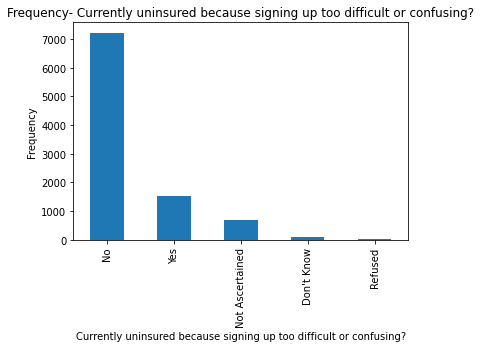

In [61]:
unins_signconfusing_freq = df['RSNHICONF_A'].value_counts()
unins_signconfusing_props = df['RSNHICONF_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Currently uninsured because signing up too difficult or confusing? Frequencies:\n", unins_signconfusing_freq)
print("\nCurrently uninsured because signing up too difficult or confusing? Proportions (%):\n", unins_signconfusing_props)

# Plot bar chart for URBRRL
unins_signconfusing_freq.plot(kind='bar')
plt.title("Frequency- Currently uninsured because signing up too difficult or confusing?")
plt.xlabel("Currently uninsured because signing up too difficult or confusing?")
plt.ylabel('Frequency')
plt.show()

Currently uninsured because cannot find a plan that meet needs? Frequencies:
 No                 7138
Yes                1598
Not Ascertained     690
Don't Know          118
Refused              10
Name: RSNHIMEET_A, dtype: int64

Currently uninsured because cannot find a plan that meet needs? Proportions (%):
 No                 74.712162
Yes                16.725979
Not Ascertained     7.222106
Don't Know          1.235085
Refused             0.104668
Name: RSNHIMEET_A, dtype: float64


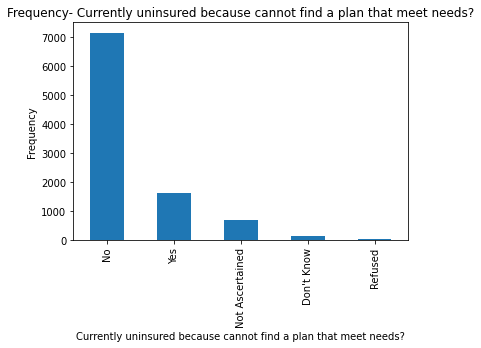

In [62]:
unins_plandontmeetneeds_freq = df['RSNHIMEET_A'].value_counts()
unins_plandontmeetneeds_props = df['RSNHIMEET_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Currently uninsured because cannot find a plan that meet needs? Frequencies:\n", unins_plandontmeetneeds_freq)
print("\nCurrently uninsured because cannot find a plan that meet needs? Proportions (%):\n", unins_plandontmeetneeds_props)

# Plot bar chart for URBRRL
unins_plandontmeetneeds_freq.plot(kind='bar')
plt.title("Frequency- Currently uninsured because cannot find a plan that meet needs?")
plt.xlabel("Currently uninsured because cannot find a plan that meet needs?")
plt.ylabel('Frequency')
plt.show()

Any time in past 12m with no coverage? Frequencies:
 No            107547
Yes             3733
Don't Know        99
Refused           46
Name: HINOTYR_A, dtype: int64

Any time in past 12m with no coverage? Proportions (%):
 No            96.519632
Yes            3.350236
Don't Know     0.088849
Refused        0.041283
Name: HINOTYR_A, dtype: float64


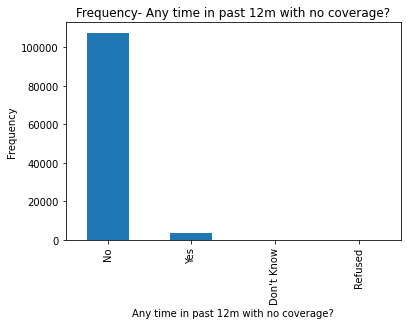

In [64]:
p12m_nocoverage_freq = df['HINOTYR_A'].value_counts()
p12m_nocoverage_props = df['HINOTYR_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Any time in past 12m with no coverage? Frequencies:\n", p12m_nocoverage_freq)
print("\nAny time in past 12m with no coverage? Proportions (%):\n", p12m_nocoverage_props)

# Plot bar chart for URBRRL
p12m_nocoverage_freq.plot(kind='bar')
plt.title("Frequency- Any time in past 12m with no coverage?")
plt.xlabel("Any time in past 12m with no coverage?")
plt.ylabel('Frequency')
plt.show()

In past 12m, how many months with no coverage? Frequencies:
 1             700
2             495
3             430
6             331
4             277
5             163
12            146
11            127
9             115
1.0           114
7             111
8             111
10            109
2.0            96
3.0            81
6.0            56
Don't Know     53
4.0            38
5.0            37
9.0            27
8.0            24
7.0            24
12.0           24
11.0           23
10.0           19
Refused         2
Name: HINOTMYR_A, dtype: int64

In past 12m, how many months with no coverage? Proportions (%):
 1             18.751674
2             13.260113
3             11.518886
6              8.866863
4              7.420305
5              4.366461
12             3.911063
11             3.402089
9              3.080632
1.0            3.053844
7              2.973480
8              2.973480
10             2.919904
2.0            2.571658
3.0            2.169837
6.0           

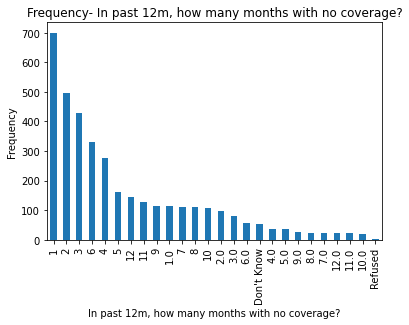

In [65]:
p12m_monthsnocoverage_freq = df['HINOTMYR_A'].value_counts()
p12m_monthsnocoverage_props = df['HINOTMYR_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("In past 12m, how many months with no coverage? Frequencies:\n", p12m_monthsnocoverage_freq)
print("\nIn past 12m, how many months with no coverage? Proportions (%):\n", p12m_monthsnocoverage_props)

# Plot bar chart for URBRRL
p12m_monthsnocoverage_freq.plot(kind='bar')
plt.title("Frequency- In past 12m, how many months with no coverage?")
plt.xlabel("In past 12m, how many months with no coverage?")
plt.ylabel('Frequency')
plt.show()

In past 12m, difficulty paying any medical bills? Frequencies:
 No                 107303
Yes                 12807
Not Ascertained       288
Don't Know            178
Refused               122
Name: PAYBLL12M_A, dtype: int64

In past 12m, difficulty paying any medical bills? Proportions (%):
 No                 88.902053
Yes                10.610781
Not Ascertained     0.238612
Don't Know          0.147476
Refused             0.101079
Name: PAYBLL12M_A, dtype: float64


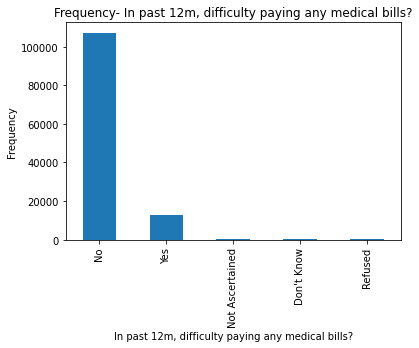

In [66]:
p12m_diffpaybill_freq = df['PAYBLL12M_A'].value_counts()
p12m_diffpaybill_props = df['PAYBLL12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("In past 12m, difficulty paying any medical bills? Frequencies:\n", p12m_diffpaybill_freq)
print("\nIn past 12m, difficulty paying any medical bills? Proportions (%):\n", p12m_diffpaybill_props)

# Plot bar chart for URBRRL
p12m_diffpaybill_freq.plot(kind='bar')
plt.title("Frequency- In past 12m, difficulty paying any medical bills?")
plt.xlabel("In past 12m, difficulty paying any medical bills?")
plt.ylabel('Frequency')
plt.show()

Get sick or accident, worry about paying bills? Frequencies:
 Not at all worried    68033
Somewhat worried      35705
Very worried          16261
Not Ascertained         345
Don't Know              240
Refused                 114
Name: PAYWORRY_A, dtype: int64

Get sick or accident, worry about paying bills? Proportions (%):
 Not at all worried    56.366303
Somewhat worried      29.582097
Very worried          13.472468
Not Ascertained        0.285837
Don't Know             0.198843
Refused                0.094451
Name: PAYWORRY_A, dtype: float64


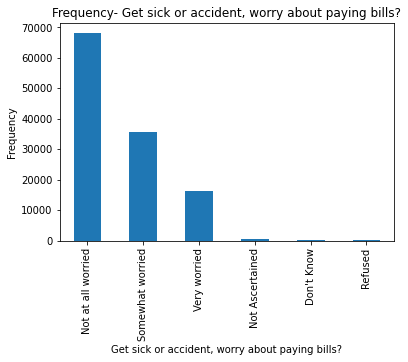

In [67]:
payworry_freq = df['PAYWORRY_A'].value_counts()
payworry_props = df['PAYWORRY_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Get sick or accident, worry about paying bills? Frequencies:\n", payworry_freq)
print("\nGet sick or accident, worry about paying bills? Proportions (%):\n", payworry_props)

# Plot bar chart for URBRRL
payworry_freq.plot(kind='bar')
plt.title("Frequency- Get sick or accident, worry about paying bills?")
plt.xlabel("Get sick or accident, worry about paying bills?")
plt.ylabel('Frequency')
plt.show()

Past 12m, did not get medical care because of cost? Frequencies:
 No                 112429
Yes                  7472
Not Ascertained       716
Refused                45
Don't Know             36
Name: MEDNG12M_A, dtype: int64

Past 12m, did not get medical care because of cost? Proportions (%):
 No                 93.149017
Yes                 6.190658
Not Ascertained     0.593216
Refused             0.037283
Don't Know          0.029827
Name: MEDNG12M_A, dtype: float64


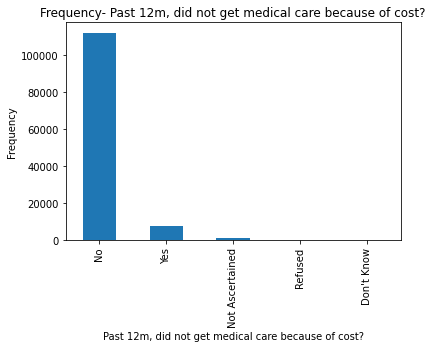

In [68]:
medng12m_freq = df['MEDNG12M_A'].value_counts()
medng12m_props = df['MEDNG12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, did not get medical care because of cost? Frequencies:\n", medng12m_freq)
print("\nPast 12m, did not get medical care because of cost? Proportions (%):\n", medng12m_props)

# Plot bar chart for URBRRL
medng12m_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, did not get medical care because of cost?")
plt.xlabel("Past 12m, did not get medical care because of cost?")
plt.ylabel('Frequency')
plt.show()

Past 12m, delayed medical care because of cost? Frequencies:
 No                 111450
Yes                  8473
Not Ascertained       708
Refused                43
Don't Know             24
Name: MEDDL12M_A, dtype: int64

Past 12m, delayed medical care because of cost? Proportions (%):
 No                 92.337901
Yes                 7.020000
Not Ascertained     0.586588
Refused             0.035626
Don't Know          0.019884
Name: MEDDL12M_A, dtype: float64


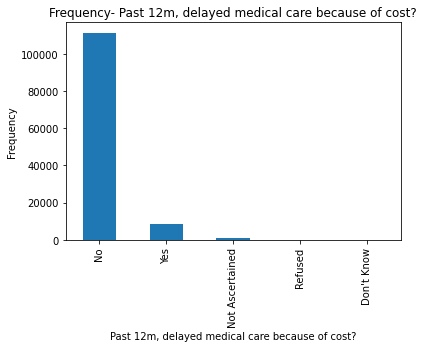

In [69]:
meddl12m_freq = df['MEDDL12M_A'].value_counts()
meddl12m_props = df['MEDDL12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, delayed medical care because of cost? Frequencies:\n", meddl12m_freq)
print("\nPast 12m, delayed medical care because of cost? Proportions (%):\n", meddl12m_props)

# Plot bar chart for URBRRL
meddl12m_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, delayed medical care because of cost?")
plt.xlabel("Past 12m, delayed medical care because of cost?")
plt.ylabel('Frequency')
plt.show()

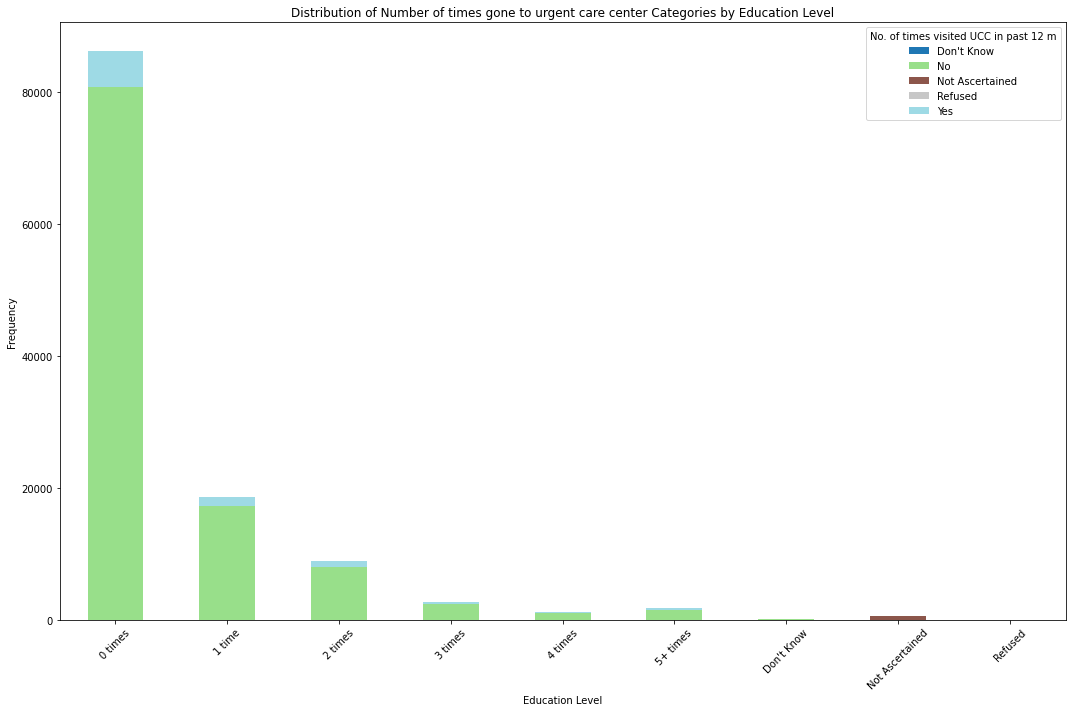

In [162]:
# Create a cross-tabulation
contingency_table_10 = pd.crosstab(df['URGNT12MTC_A'], df['MEDDL12M_A'])

# Plot a stacked bar chart
contingency_table_10.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title('Distribution of Number of times gone to urgent care center Categories by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='No. of times visited UCC in past 12 m')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

Past 12m, took prescription medication? Frequencies:
 Yes                84741
No                 34978
Not Ascertained      826
Refused              112
Don't Know            41
Name: RX12M_A, dtype: int64

Past 12m, took prescription medication? Proportions (%):
 Yes                70.209117
No                 28.979768
Not Ascertained     0.684353
Refused             0.092794
Don't Know          0.033969
Name: RX12M_A, dtype: float64


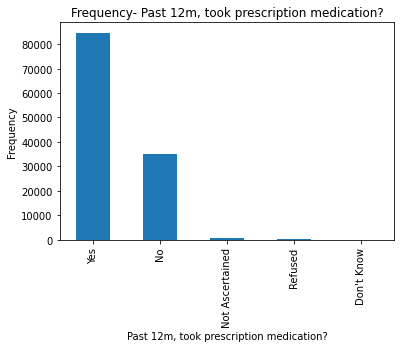

In [70]:
rx12m_freq = df['RX12M_A'].value_counts()
rx12m_props = df['RX12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, took prescription medication? Frequencies:\n", rx12m_freq)
print("\nPast 12m, took prescription medication? Proportions (%):\n", rx12m_props)

# Plot bar chart for URBRRL
rx12m_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, took prescription medication?")
plt.xlabel("Past 12m, took prescription medication?")
plt.ylabel('Frequency')
plt.show()

Past 12m, skipped medication doses to save money? Frequencies:
 No                 81112
Yes                 3599
Not Ascertained       14
Don't Know            13
Refused                3
Name: RXSK12M_A, dtype: int64

Past 12m, skipped medication doses to save money? Proportions (%):
 No                 95.717539
Yes                 4.247059
Not Ascertained     0.016521
Don't Know          0.015341
Refused             0.003540
Name: RXSK12M_A, dtype: float64


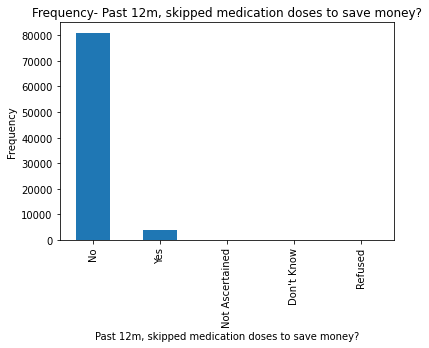

In [71]:
skip_meddoses_freq = df['RXSK12M_A'].value_counts()
skip_meddoses_props = df['RXSK12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, skipped medication doses to save money? Frequencies:\n", skip_meddoses_freq)
print("\nPast 12m, skipped medication doses to save money? Proportions (%):\n", skip_meddoses_props)

# Plot bar chart for URBRRL
skip_meddoses_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, skipped medication doses to save money?")
plt.xlabel("Past 12m, skipped medication doses to save money?")
plt.ylabel('Frequency')
plt.show()

Past 12m, took less medication to save money? Frequencies:
 No                 80677
Yes                 4029
Not Ascertained       18
Don't Know            13
Refused                4
Name: RXLS12M_A, dtype: int64

Past 12m, took less medication to save money? Proportions (%):
 No                 95.204210
Yes                 4.754487
Not Ascertained     0.021241
Don't Know          0.015341
Refused             0.004720
Name: RXLS12M_A, dtype: float64


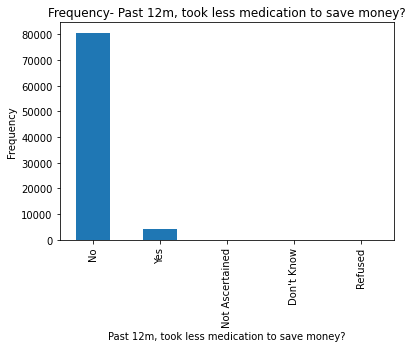

In [72]:
less_meddoses_freq = df['RXLS12M_A'].value_counts()
less_meddoses_props = df['RXLS12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, took less medication to save money? Frequencies:\n", less_meddoses_freq)
print("\nPast 12m, took less medication to save money? Proportions (%):\n", less_meddoses_props)

# Plot bar chart for URBRRL
less_meddoses_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, took less medication to save money?")
plt.xlabel("Past 12m, took less medication to save money?")
plt.ylabel('Frequency')
plt.show()

Past 12m, delayed filling prescription to save money? Frequencies:
 No                 79679
Yes                 5032
Not Ascertained       18
Don't Know             8
Refused                4
Name: RXDL12M_A, dtype: int64

Past 12m, delayed filling prescription to save money? Proportions (%):
 No                 94.026504
Yes                 5.938094
Not Ascertained     0.021241
Don't Know          0.009441
Refused             0.004720
Name: RXDL12M_A, dtype: float64


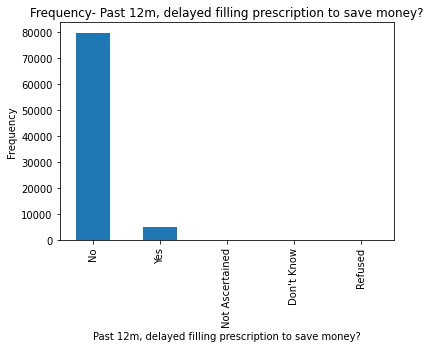

In [73]:
delay_presc_freq = df['RXDL12M_A'].value_counts()
delay_presc_props = df['RXDL12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, delayed filling prescription to save money? Frequencies:\n", delay_presc_freq)
print("\nPast 12m, delayed filling prescription to save money? Proportions (%):\n", delay_presc_props)

# Plot bar chart for URBRRL
delay_presc_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, delayed filling prescription to save money?")
plt.xlabel("Past 12m, delayed filling prescription to save money?")
plt.ylabel('Frequency')
plt.show()

Past 12m, did not get therapy due to cost? Frequencies:
 No                 113720
Yes                  4979
Not Ascertained      1827
Refused               121
Don't Know             51
Name: MHTHND_A, dtype: int64

Past 12m, did not get therapy due to cost? Proportions (%):
 No                 94.218628
Yes                 4.125172
Not Ascertained     1.513695
Refused             0.100250
Don't Know          0.042254
Name: MHTHND_A, dtype: float64


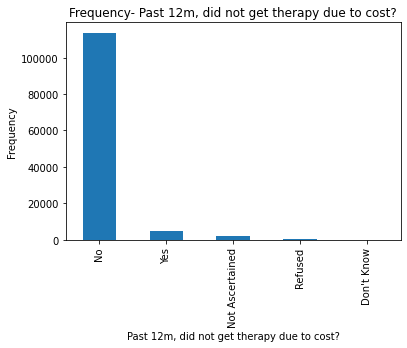

In [74]:
dng_menntalhealth_freq = df['MHTHND_A'].value_counts()
dng_menntalhealth_props = df['MHTHND_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, did not get therapy due to cost? Frequencies:\n", dng_menntalhealth_freq)
print("\nPast 12m, did not get therapy due to cost? Proportions (%):\n", dng_menntalhealth_props)

# Plot bar chart for URBRRL
dng_menntalhealth_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, did not get therapy due to cost?")
plt.xlabel("Past 12m, did not get therapy due to cost?")
plt.ylabel('Frequency')
plt.show()

Time since last saw doctor? Frequencies:
 Within the past year        102508
Within the last 2 years       9355
Within the last 3 years       3046
Within the last 5 years       2233
Within the last 10 years      1277
10 years ago or more          1145
Not Ascertained                599
Never                          281
Don't Know                     161
Refused                         93
Name: LASTDR_A, dtype: int64

Time since last saw doctor? Proportions (%):
 Within the past year        84.929328
Within the last 2 years      7.750750
Within the last 3 years      2.523654
Within the last 5 years      1.850072
Within the last 10 years     1.058013
10 years ago or more         0.948649
Not Ascertained              0.496280
Never                        0.232812
Don't Know                   0.133391
Refused                      0.077052
Name: LASTDR_A, dtype: float64


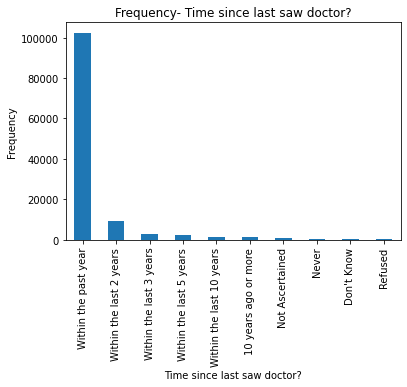

In [75]:
last_docvisit_freq = df['LASTDR_A'].value_counts()
last_docvisit_props = df['LASTDR_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Time since last saw doctor? Frequencies:\n", last_docvisit_freq)
print("\nTime since last saw doctor? Proportions (%):\n", last_docvisit_props)

# Plot bar chart for URBRRL
last_docvisit_freq.plot(kind='bar')
plt.title("Frequency- Time since last saw doctor?")
plt.xlabel("Time since last saw doctor?")
plt.ylabel('Frequency')
plt.show()

Last visit a wellness visit? Frequencies:
 Yes                95280
No                 23963
Don't Know           285
Refused               25
Not Ascertained       11
Name: WELLNESS_A, dtype: int64

Last visit a wellness visit? Proportions (%):
 Yes                79.689539
No                 20.041986
Don't Know          0.238366
Refused             0.020909
Not Ascertained     0.009200
Name: WELLNESS_A, dtype: float64


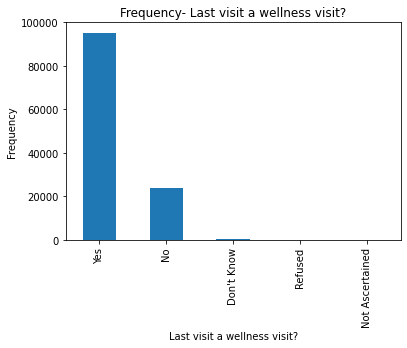

In [76]:
last_wellvisit_freq = df['WELLNESS_A'].value_counts()
last_wellvisit_props = df['WELLNESS_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last visit a wellness visit? Frequencies:\n", last_wellvisit_freq)
print("\nLast visit a wellness visit? Proportions (%):\n", last_wellvisit_props)

# Plot bar chart for URBRRL
last_wellvisit_freq.plot(kind='bar')
plt.title("Frequency- Last visit a wellness visit?")
plt.xlabel("Last visit a wellness visit?")
plt.ylabel('Frequency')
plt.show()

Have a usual place for care? Frequencies:
 Yes                             107423
There is NO place                10463
There is MORE THAN ONE place      2088
Not Ascertained                    629
Refused                             53
Don't Know                          42
Name: USUALPL_A, dtype: int64

Have a usual place for care? Proportions (%):
 Yes                             89.001475
There is NO place                8.668743
There is MORE THAN ONE place     1.729938
Not Ascertained                  0.521135
Refused                          0.043911
Don't Know                       0.034798
Name: USUALPL_A, dtype: float64


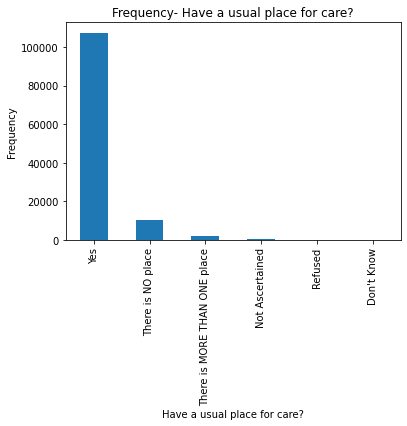

In [77]:
usual_placeforcare_freq = df['USUALPL_A'].value_counts()
usual_placeforcare_props = df['USUALPL_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Have a usual place for care? Frequencies:\n", usual_placeforcare_freq)
print("\nHave a usual place for care? Proportions (%):\n", usual_placeforcare_props)

# Plot bar chart for URBRRL
usual_placeforcare_freq.plot(kind='bar')
plt.title("Frequency- Have a usual place for care?")
plt.xlabel("Have a usual place for care?")
plt.ylabel('Frequency')
plt.show()

Type of place for usual care? Frequencies:
 A doctor's office or health center                               97352
Urgent care center or clinic in a drug store or grocery store     7026
A VA Medical Center or VA outpatient clinic                       2322
Hospital emergency room                                           1657
Some other place                                                   816
Does not go to one place most often                                347
Refused                                                             50
Don't Know                                                          26
Not Ascertained                                                     10
Name: USPLKIND_A, dtype: int64

Type of place for usual care? Proportions (%):
 A doctor's office or health center                               88.819955
Urgent care center or clinic in a drug store or grocery store     6.410233
A VA Medical Center or VA outpatient clinic                       2.118497
Hospital eme

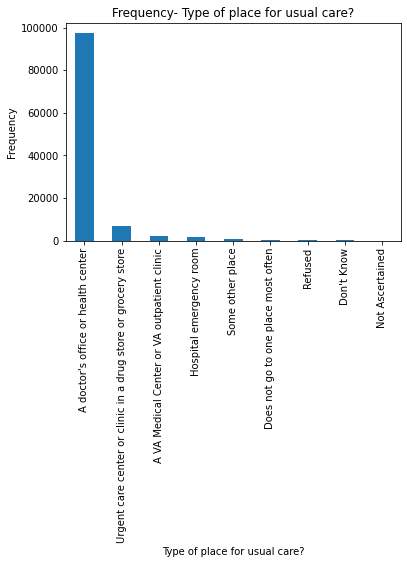

In [78]:
usual_placetype_freq = df['USPLKIND_A'].value_counts()
usual_placetype_props = df['USPLKIND_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Type of place for usual care? Frequencies:\n", usual_placetype_freq)
print("\nType of place for usual care? Proportions (%):\n", usual_placetype_props)

# Plot bar chart for URBRRL
usual_placetype_freq.plot(kind='bar')
plt.title("Frequency- Type of place for usual care?")
plt.xlabel("Type of place for usual care?")
plt.ylabel('Frequency')
plt.show()

Past 12m, number of urgent care visits? Frequencies:
 0 times            86308
1 time             18701
2 times             8899
3 times             2763
5+ times            1882
4 times             1180
Not Ascertained      675
Don't Know           220
Refused               70
Name: URGNT12MTC_A, dtype: int64

Past 12m, number of urgent care visits? Proportions (%):
 0 times            71.507399
1 time             15.494043
2 times             7.372947
3 times             2.289185
5+ times            1.559264
4 times             0.977647
Not Ascertained     0.559247
Don't Know          0.182273
Refused             0.057996
Name: URGNT12MTC_A, dtype: float64


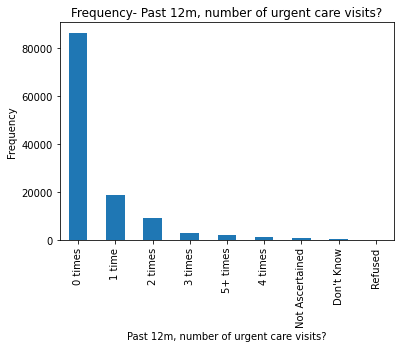

In [79]:
p12m_urgntcarevisits_freq = df['URGNT12MTC_A'].value_counts()
p12m_urgntcarevisits_props = df['URGNT12MTC_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, number of urgent care visits? Frequencies:\n", p12m_urgntcarevisits_freq)
print("\nPast 12m, number of urgent care visits? Proportions (%):\n", p12m_urgntcarevisits_props)

# Plot bar chart for URBRRL
p12m_urgntcarevisits_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, number of urgent care visits?")
plt.xlabel("Past 12m, number of urgent care visits?")
plt.ylabel('Frequency')
plt.show()

Past 12m, number of hospital emergency room visits? Frequencies:
 0 times            96019
1 time             15322
2 times             5560
4+ times            1580
3 times             1339
Not Ascertained      693
Don't Know           116
Refused               69
Name: EMERG12MTC_A, dtype: int64

Past 12m, number of hospital emergency room visits? Proportions (%):
 0 times            79.553099
1 time             12.694494
2 times             4.606539
4+ times            1.309052
3 times             1.109380
Not Ascertained     0.574160
Don't Know          0.096108
Refused             0.057167
Name: EMERG12MTC_A, dtype: float64


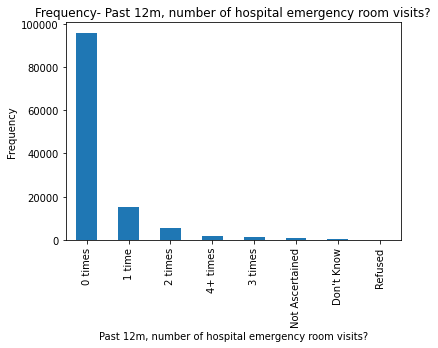

In [81]:
p12m_hospemergvisits_freq = df['EMERG12MTC_A'].value_counts()
p12m_hospemergvisits_props = df['EMERG12MTC_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, number of hospital emergency room visits? Frequencies:\n", p12m_hospemergvisits_freq)
print("\nPast 12m, number of hospital emergency room visits? Proportions (%):\n", p12m_hospemergvisits_props)

# Plot bar chart for URBRRL
p12m_hospemergvisits_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, number of hospital emergency room visits?")
plt.xlabel("Past 12m, number of hospital emergency room visits?")
plt.ylabel('Frequency')
plt.show()

Time since last dental exam/cleaning? Frequencies:
 Within the past year        59617
Within the last 2 years     11171
Within the last 3 years      5324
10 years ago or more         5079
Within the last 5 years      4929
Within the last 10 years     3652
Never                         610
Don't Know                    400
Not Ascertained               340
Refused                        94
Name: DENPREV_A, dtype: int64

Time since last dental exam/cleaning? Proportions (%):
 Within the past year        65.358051
Within the last 2 years     12.246755
Within the last 3 years      5.836695
10 years ago or more         5.568102
Within the last 5 years      5.403657
Within the last 10 years     4.003684
Never                        0.668742
Don't Know                   0.438520
Not Ascertained              0.372742
Refused                      0.103052
Name: DENPREV_A, dtype: float64


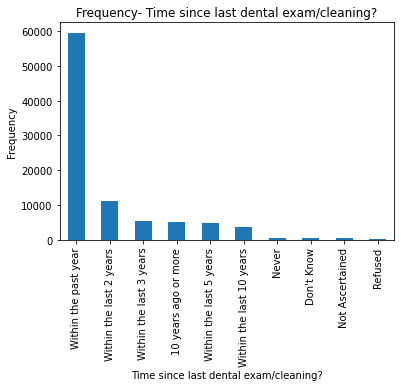

In [82]:
last_dentalvisit_freq = df['DENPREV_A'].value_counts()
last_dentalvisit_props = df['DENPREV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Time since last dental exam/cleaning? Frequencies:\n", last_dentalvisit_freq)
print("\nTime since last dental exam/cleaning? Proportions (%):\n", last_dentalvisit_props)

# Plot bar chart for URBRRL
last_dentalvisit_freq.plot(kind='bar')
plt.title("Frequency- Time since last dental exam/cleaning?")
plt.xlabel("Time since last dental exam/cleaning?")
plt.ylabel('Frequency')
plt.show()

Past 12m, delayed dental care because of the cost? Frequencies:
 No                 73426
Yes                17320
Not Ascertained      362
Don't Know            55
Refused               53
Name: DENDL12M_A, dtype: int64

Past 12m, delayed dental care because of the cost? Proportions (%):
 No                 80.496843
Yes                18.987897
Not Ascertained     0.396860
Don't Know          0.060296
Refused             0.058104
Name: DENDL12M_A, dtype: float64


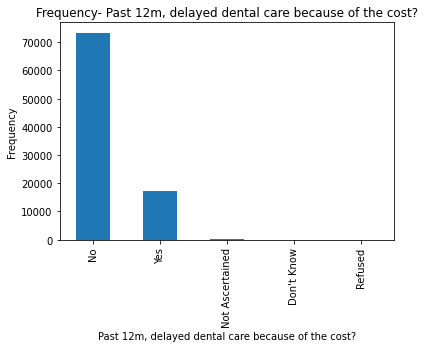

In [83]:
p12m_delaydentcare_freq = df['DENDL12M_A'].value_counts()
p12m_delaydentcare_props = df['DENDL12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, delayed dental care because of the cost? Frequencies:\n", p12m_delaydentcare_freq)
print("\nPast 12m, delayed dental care because of the cost? Proportions (%):\n", p12m_delaydentcare_props)

# Plot bar chart for URBRRL
p12m_delaydentcare_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, delayed dental care because of the cost?")
plt.xlabel("Past 12m, delayed dental care because of the cost?")
plt.ylabel('Frequency')
plt.show()

Past 12m, did not get dental care because of the cost? Frequencies:
 No                 77043
Yes                13695
Not Ascertained      369
Refused               55
Don't Know            54
Name: DENNG12M_A, dtype: int64

Past 12m, did not get dental care because of the cost? Proportions (%):
 No                 84.462156
Yes                15.013813
Not Ascertained     0.404534
Refused             0.060296
Don't Know          0.059200
Name: DENNG12M_A, dtype: float64


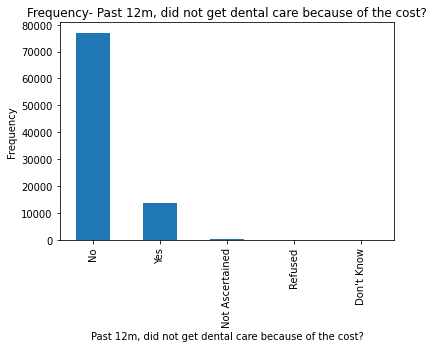

In [84]:
p12m_dngdentcare_freq = df['DENNG12M_A'].value_counts()
p12m_dngdentcare_props = df['DENNG12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, did not get dental care because of the cost? Frequencies:\n", p12m_dngdentcare_freq)
print("\nPast 12m, did not get dental care because of the cost? Proportions (%):\n", p12m_dngdentcare_props)

# Plot bar chart for URBRRL
p12m_dngdentcare_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, did not get dental care because of the cost?")
plt.xlabel("Past 12m, did not get dental care because of the cost?")
plt.ylabel('Frequency')
plt.show()

Past 12m, have you had a flu vaccination? Frequencies:
 Yes                62416
No                 56556
Not Ascertained     1239
Don't Know           324
Refused              163
Name: SHTFLU12M_A, dtype: int64

Past 12m, have you had a flu vaccination? Proportions (%):
 Yes                51.712539
No                 46.857446
Not Ascertained     1.026529
Don't Know          0.268439
Refused             0.135048
Name: SHTFLU12M_A, dtype: float64


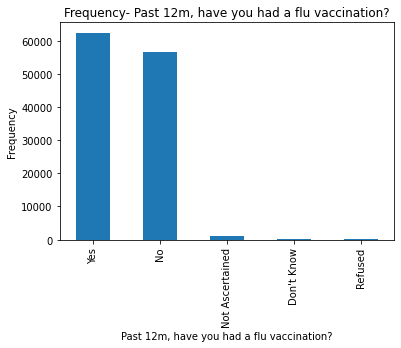

In [85]:
p12m_flushot_freq = df['SHTFLU12M_A'].value_counts()
p12m_flushot_props = df['SHTFLU12M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, have you had a flu vaccination? Frequencies:\n", p12m_flushot_freq)
print("\nPast 12m, have you had a flu vaccination? Proportions (%):\n", p12m_flushot_props)

# Plot bar chart for URBRRL
p12m_flushot_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, have you had a flu vaccination?")
plt.xlabel("Past 12m, have you had a flu vaccination?")
plt.ylabel('Frequency')
plt.show()

Ever told you had angina pectoris? Frequencies:
 No            118081
Yes             2297
Don't Know       226
Refused           94
Name: ANGEV_A, dtype: int64

Ever told you had angina pectoris? Proportions (%):
 No            97.831778
Yes            1.903097
Don't Know     0.187244
Refused        0.077880
Name: ANGEV_A, dtype: float64


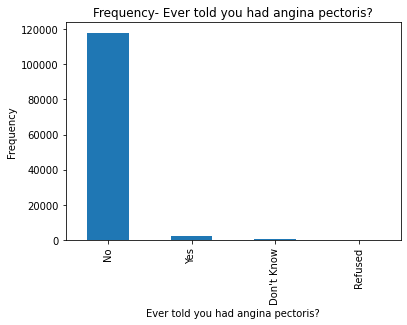

In [86]:
angev_freq = df['ANGEV_A'].value_counts()
angev_props = df['ANGEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had angina pectoris? Frequencies:\n", angev_freq)
print("\nEver told you had angina pectoris? Proportions (%):\n", angev_props)

# Plot bar chart for URBRRL
angev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had angina pectoris?")
plt.xlabel("Ever told you had angina pectoris?")
plt.ylabel('Frequency')
plt.show()

Ever told you had heart attack/myocardial infarction? Frequencies:
 No            116043
Yes             4499
Refused           89
Don't Know        67
Name: MIEV_A, dtype: int64

Ever told you had heart attack/myocardial infarction? Proportions (%):
 No            96.143267
Yes            3.727485
Refused        0.073738
Don't Know     0.055510
Name: MIEV_A, dtype: float64


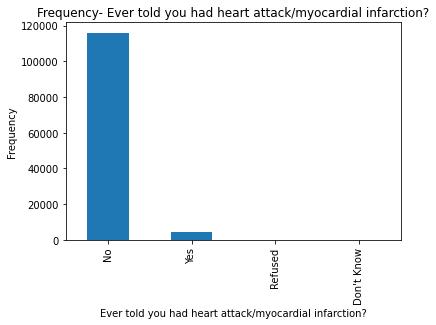

In [87]:
miev_freq = df['MIEV_A'].value_counts()
miev_props = df['MIEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had heart attack/myocardial infarction? Frequencies:\n", miev_freq)
print("\nEver told you had heart attack/myocardial infarction? Proportions (%):\n", miev_props)

# Plot bar chart for URBRRL
miev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had heart attack/myocardial infarction?")
plt.xlabel("Ever told you had heart attack/myocardial infarction?")
plt.ylabel('Frequency')
plt.show()

Ever told you had coronary heart disease? Frequencies:
 No                 113089
Yes                  7269
Don't Know            239
Refused               100
Not Ascertained         1
Name: CHDEV_A, dtype: int64

Ever told you had coronary heart disease? Proportions (%):
 No                 93.695836
Yes                 6.022469
Don't Know          0.198015
Refused             0.082851
Not Ascertained     0.000829
Name: CHDEV_A, dtype: float64


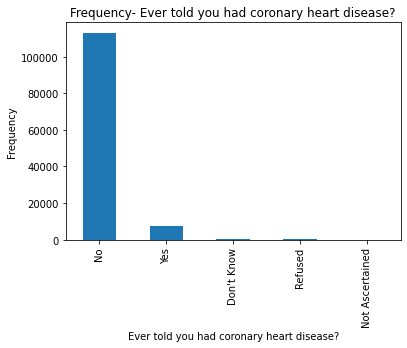

In [88]:
chdev_freq = df['CHDEV_A'].value_counts()
chdev_props = df['CHDEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had coronary heart disease? Frequencies:\n", chdev_freq)
print("\nEver told you had coronary heart disease? Proportions (%):\n", chdev_props)

# Plot bar chart for URBRRL
chdev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had coronary heart disease?")
plt.xlabel("Ever told you had coronary heart disease?")
plt.ylabel('Frequency')
plt.show()

Ever told you had high cholestrol? Frequencies:
 No            83432
Yes           36856
Don't Know      294
Refused         116
Name: CHLEV_A, dtype: int64

Ever told you had high cholestrol? Proportions (%):
 No            69.124592
Yes           30.535717
Don't Know     0.243583
Refused        0.096108
Name: CHLEV_A, dtype: float64


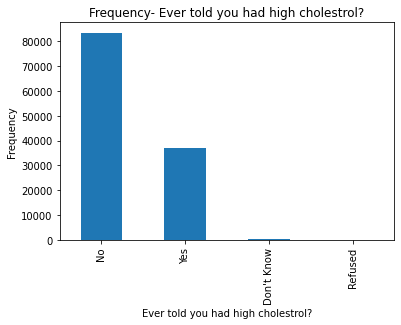

In [89]:
chlev_freq = df['CHLEV_A'].value_counts()
chlev_props = df['CHLEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had high cholestrol? Frequencies:\n", chlev_freq)
print("\nEver told you had high cholestrol? Proportions (%):\n", chlev_props)

# Plot bar chart for URBRRL
chlev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had high cholestrol?")
plt.xlabel("Ever told you had high cholestrol?")
plt.ylabel('Frequency')
plt.show()

Ever told you had high blood pressure/hypertension? Frequencies:
 No            76710
Yes           43783
Refused         124
Don't Know       81
Name: HYPEV_A, dtype: int64

Ever told you had high blood pressure/hypertension? Proportions (%):
 No            63.555320
Yes           36.274835
Refused        0.102736
Don't Know     0.067110
Name: HYPEV_A, dtype: float64


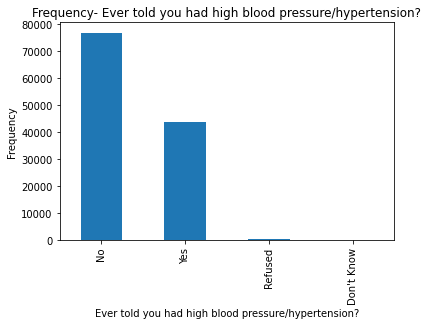

In [90]:
hypev_freq = df['HYPEV_A'].value_counts()
hypev_props = df['HYPEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had high blood pressure/hypertension? Frequencies:\n", hypev_freq)
print("\nEver told you had high blood pressure/hypertension? Proportions (%):\n", hypev_props)

# Plot bar chart for URBRRL
hypev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had high blood pressure/hypertension?")
plt.xlabel("Ever told you had high blood pressure/hypertension?")
plt.ylabel('Frequency')
plt.show()

Ever told you had chronic obstructive pulmonary disease/bronchitis? Frequencies:
 No            113679
Yes             6853
Refused           88
Don't Know        78
Name: COPDEV_A, dtype: int64

Ever told you had chronic obstructive pulmonary disease/bronchitis? Proportions (%):
 No            94.184659
Yes            5.677807
Refused        0.072909
Don't Know     0.064624
Name: COPDEV_A, dtype: float64


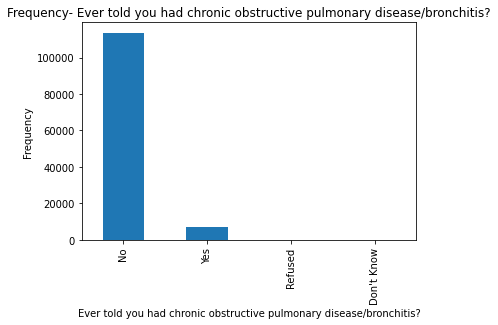

In [91]:
copdev_freq = df['COPDEV_A'].value_counts()
copdev_props = df['COPDEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had chronic obstructive pulmonary disease/bronchitis? Frequencies:\n", copdev_freq)
print("\nEver told you had chronic obstructive pulmonary disease/bronchitis? Proportions (%):\n", copdev_props)

# Plot bar chart for URBRRL
copdev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had chronic obstructive pulmonary disease/bronchitis?")
plt.xlabel("Ever told you had chronic obstructive pulmonary disease/bronchitis?")
plt.ylabel('Frequency')
plt.show()

Ever told you had asthma? Frequencies:
 No            104046
Yes            16520
Refused           81
Don't Know        51
Name: ASEV_A, dtype: int64

Ever told you had asthma? Proportions (%):
 No            86.203582
Yes           13.687054
Refused        0.067110
Don't Know     0.042254
Name: ASEV_A, dtype: float64


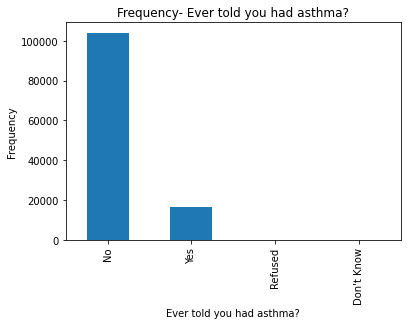

In [92]:
asev_freq = df['ASEV_A'].value_counts()
asev_props = df['ASEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had asthma? Frequencies:\n", asev_freq)
print("\nEver told you had asthma? Proportions (%):\n", asev_props)

# Plot bar chart for URBRRL
asev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had asthma?")
plt.xlabel("Ever told you had asthma?")
plt.ylabel('Frequency')
plt.show()

Ever told you had cancer/malignancy of any kind? Frequencies:
 No            105495
Yes            15058
Refused          102
Don't Know        43
Name: CANEV_A, dtype: int64

Ever told you had cancer/malignancy of any kind? Proportions (%):
 No            87.404099
Yes           12.475766
Refused        0.084508
Don't Know     0.035626
Name: CANEV_A, dtype: float64


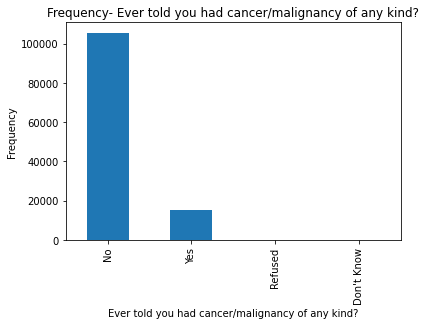

In [93]:
canev_freq = df['CANEV_A'].value_counts()
canev_props = df['CANEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had cancer/malignancy of any kind? Frequencies:\n", canev_freq)
print("\nEver told you had cancer/malignancy of any kind? Proportions (%):\n", canev_props)

# Plot bar chart for URBRRL
canev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had cancer/malignancy of any kind?")
plt.xlabel("Ever told you had cancer/malignancy of any kind?")
plt.ylabel('Frequency')
plt.show()

Ever told you had arthritis? Frequencies:
 No            89050
Yes           31456
Don't Know       98
Refused          94
Name: ARTHEV_A, dtype: int64

Ever told you had arthritis? Proportions (%):
 No            73.779184
Yes           26.061741
Don't Know     0.081194
Refused        0.077880
Name: ARTHEV_A, dtype: float64


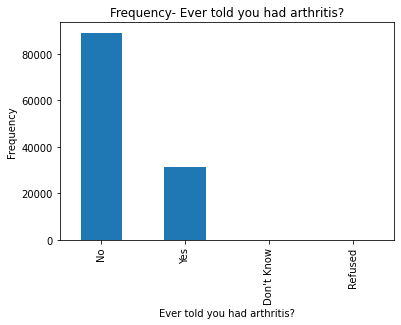

In [94]:
arthev_freq = df['ARTHEV_A'].value_counts()
arthev_props = df['ARTHEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had arthritis? Frequencies:\n", arthev_freq)
print("\nEver told you had arthritis? Proportions (%):\n", arthev_props)

# Plot bar chart for URBRRL
arthev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had arthritis?")
plt.xlabel("Ever told you had arthritis?")
plt.ylabel('Frequency')
plt.show()

Ever told you had dementia? Frequencies:
 No            119185
Yes             1392
Refused           80
Don't Know        41
Name: DEMENEV_A, dtype: int64

Ever told you had dementia? Proportions (%):
 No            98.746458
Yes            1.153292
Refused        0.066281
Don't Know     0.033969
Name: DEMENEV_A, dtype: float64


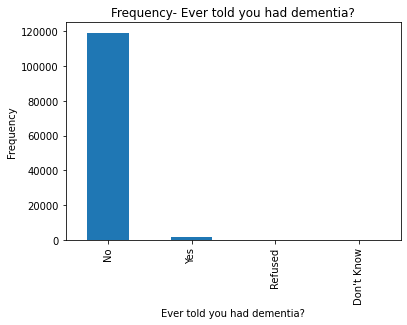

In [95]:
demenev_freq = df['DEMENEV_A'].value_counts()
demenev_props = df['DEMENEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had dementia? Frequencies:\n", demenev_freq)
print("\nEver told you had dementia? Proportions (%):\n", demenev_props)

# Plot bar chart for URBRRL
demenev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had dementia?")
plt.xlabel("Ever told you had dementia?")
plt.ylabel('Frequency')
plt.show()

Ever told you had diabetes? Frequencies:
 No            107765
Yes            12791
Refused           94
Don't Know        48
Name: DIBEV_A, dtype: int64

Ever told you had diabetes? Proportions (%):
 No            89.284827
Yes           10.597524
Refused        0.077880
Don't Know     0.039769
Name: DIBEV_A, dtype: float64


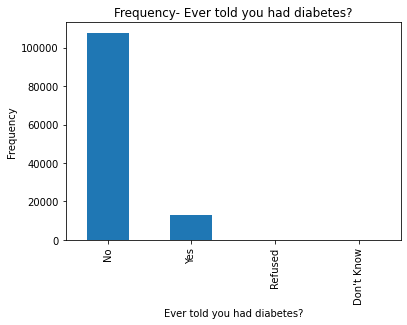

In [96]:
dibev_freq = df['DIBEV_A'].value_counts()
dibev_props = df['DIBEV_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Ever told you had diabetes? Frequencies:\n", dibev_freq)
print("\nEver told you had diabetes? Proportions (%):\n", dibev_props)

# Plot bar chart for URBRRL
dibev_freq.plot(kind='bar')
plt.title("Frequency- Ever told you had diabetes?")
plt.xlabel("Ever told you had diabetes?")
plt.ylabel('Frequency')
plt.show()

Body Mass Index Frequencies:
 Overweight        40599
Obese             37911
Healthy weight    37361
Unknown            2955
Underweight        1872
Name: BMICAT_A, dtype: int64

Body Mass Index Proportions (%):
 Overweight        33.636846
Obese             31.409800
Healthy weight    30.954117
Unknown            2.448259
Underweight        1.550978
Name: BMICAT_A, dtype: float64


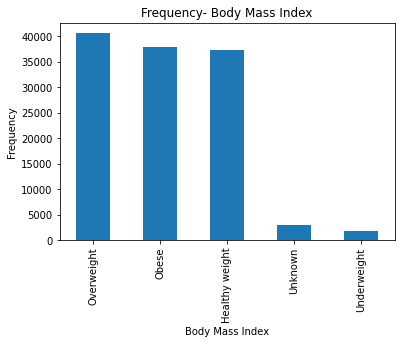

In [97]:
bmicat_freq = df['BMICAT_A'].value_counts()
bmicat_props = df['BMICAT_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Body Mass Index Frequencies:\n", bmicat_freq)
print("\nBody Mass Index Proportions (%):\n", bmicat_props)

# Plot bar chart for URBRRL
bmicat_freq.plot(kind='bar')
plt.title("Frequency- Body Mass Index")
plt.xlabel("Body Mass Index")
plt.ylabel('Frequency')
plt.show()

How often feel worried, nervous, anxious? Frequencies:
 A few times a year    38065
Never                 35666
Weekly                16322
Daily                 14909
Monthly               13476
Not Ascertained        1674
Don't Know              375
Refused                 211
Name: ANXFREQ_A, dtype: int64

How often feel worried, nervous, anxious? Proportions (%):
 A few times a year    31.537391
Never                 29.549785
Weekly                13.523008
Daily                 12.352317
Monthly               11.165057
Not Ascertained        1.386933
Don't Know             0.310693
Refused                0.174816
Name: ANXFREQ_A, dtype: float64


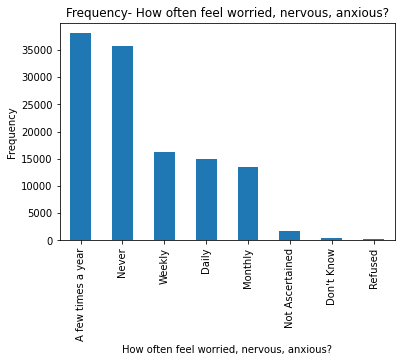

In [98]:
anxfreq_freq = df['ANXFREQ_A'].value_counts()
anxfreq_props = df['ANXFREQ_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("How often feel worried, nervous, anxious? Frequencies:\n", anxfreq_freq)
print("\nHow often feel worried, nervous, anxious? Proportions (%):\n", anxfreq_props)

# Plot bar chart for URBRRL
anxfreq_freq.plot(kind='bar')
plt.title("Frequency- How often feel worried, nervous, anxious?")
plt.xlabel("How often feel worried, nervous, anxious?")
plt.ylabel('Frequency')
plt.show()

Take medication for anxious feelings? Frequencies:
 No                 102765
Yes                 15992
Not Ascertained      1690
Refused               153
Don't Know             98
Name: ANXMED_A, dtype: int64

Take medication for anxious feelings? Proportions (%):
 No                 85.142256
Yes                13.249598
Not Ascertained     1.400189
Refused             0.126763
Don't Know          0.081194
Name: ANXMED_A, dtype: float64


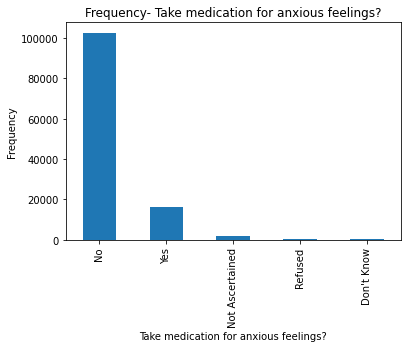

In [99]:
anxmed_freq = df['ANXMED_A'].value_counts()
anxmed_props = df['ANXMED_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Take medication for anxious feelings? Frequencies:\n", anxmed_freq)
print("\nTake medication for anxious feelings? Proportions (%):\n", anxmed_props)

# Plot bar chart for URBRRL
anxmed_freq.plot(kind='bar')
plt.title("Frequency- Take medication for anxious feelings?")
plt.xlabel("Take medication for anxious feelings?")
plt.ylabel('Frequency')
plt.show()

Level of feelings when anxious Frequencies:
 A little                                   41756
Somewhere in between a little and a lot    31940
A lot                                       9604
Don't Know                                   345
Refused                                      235
Not Ascertained                               35
Name: ANXLEVEL_A, dtype: int64

Level of feelings when anxious Proportions (%):
 A little                                   49.759876
Somewhere in between a little and a lot    38.062325
A lot                                      11.444914
Don't Know                                  0.411130
Refused                                     0.280045
Not Ascertained                             0.041709
Name: ANXLEVEL_A, dtype: float64


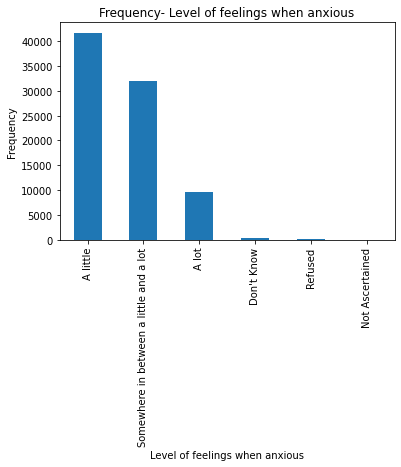

In [100]:
anxlevel_freq = df['ANXLEVEL_A'].value_counts()
anxlevel_props = df['ANXLEVEL_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Level of feelings when anxious Frequencies:\n", anxlevel_freq)
print("\nLevel of feelings when anxious Proportions (%):\n", anxlevel_props)

# Plot bar chart for URBRRL
anxlevel_freq.plot(kind='bar')
plt.title("Frequency- Level of feelings when anxious")
plt.xlabel("Level of feelings when anxious")
plt.ylabel('Frequency')
plt.show()

How often feel depressed? Frequencies:
 Never                 64109
A few times a year    33463
Monthly                8657
Weekly                 7038
Daily                  5039
Not Ascertained        1740
Don't Know              386
Refused                 266
Name: DEPFREQ_A, dtype: int64

How often feel depressed? Proportions (%):
 Never                 53.115213
A few times a year    27.724569
Monthly                7.172447
Weekly                 5.831083
Daily                  4.174883
Not Ascertained        1.441615
Don't Know             0.319806
Refused                0.220385
Name: DEPFREQ_A, dtype: float64


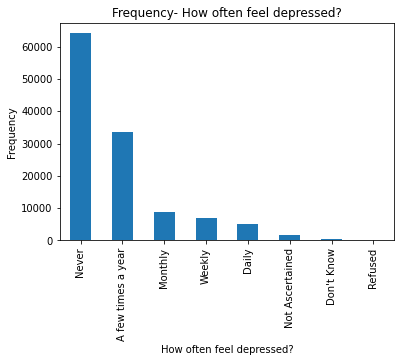

In [101]:
depfreq_freq = df['DEPFREQ_A'].value_counts()
depfreq_props = df['DEPFREQ_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("How often feel depressed? Frequencies:\n", depfreq_freq)
print("\nHow often feel depressed? Proportions (%):\n", depfreq_props)

# Plot bar chart for URBRRL
depfreq_freq.plot(kind='bar')
plt.title("Frequency- How often feel depressed?")
plt.xlabel("How often feel depressed?")
plt.ylabel('Frequency')
plt.show()

Take medication for depression? Frequencies:
 No                 104982
Yes                 13674
Not Ascertained      1744
Refused               193
Don't Know            105
Name: DEPMED_A, dtype: int64

Take medication for depression? Proportions (%):
 No                 86.979072
Yes                11.329102
Not Ascertained     1.444929
Refused             0.159903
Don't Know          0.086994
Name: DEPMED_A, dtype: float64


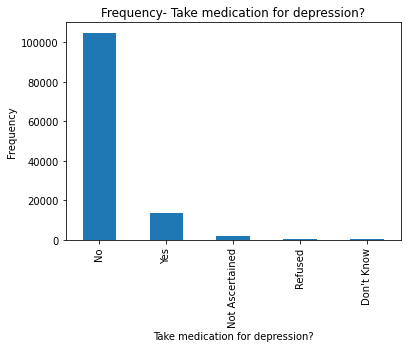

In [102]:
depmed_freq = df['DEPMED_A'].value_counts()
depmed_props = df['DEPMED_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Take medication for depression? Frequencies:\n", depmed_freq)
print("\nTake medication for depression? Proportions (%):\n", depmed_props)

# Plot bar chart for URBRRL
depmed_freq.plot(kind='bar')
plt.title("Frequency- Take medication for depression?")
plt.xlabel("Take medication for depression?")
plt.ylabel('Frequency')
plt.show()

Level of how depressed Frequencies:
 A little                                   27966
Somewhere in between a little and a lot    20004
A lot                                       7205
Don't Know                                   380
Refused                                      268
Not Ascertained                                7
Name: DEPLEVEL_A, dtype: int64

Level of how depressed Proportions (%):
 A little                                   50.091349
Somewhere in between a little and a lot    35.830199
A lot                                      12.905248
Don't Know                                  0.680638
Refused                                     0.480029
Not Ascertained                             0.012538
Name: DEPLEVEL_A, dtype: float64


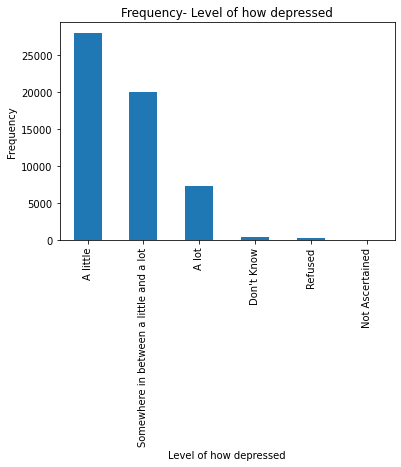

In [103]:
deplevel_freq = df['DEPLEVEL_A'].value_counts()
deplevel_props = df['DEPLEVEL_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Level of how depressed Frequencies:\n", deplevel_freq)
print("\nLevel of how depressed Proportions (%):\n", deplevel_props)

# Plot bar chart for URBRRL
deplevel_freq.plot(kind='bar')
plt.title("Frequency- Level of how depressed")
plt.xlabel("Level of how depressed")
plt.ylabel('Frequency')
plt.show()

Take medication for concentration/emotions? Frequencies:
 No                 97158
Yes                 2317
Refused              151
Don't Know            61
Not Ascertained       33
Name: MHRX_A, dtype: int64

Take medication for concentration/emotions? Proportions (%):
 No                 97.430806
Yes                 2.323506
Refused             0.151424
Don't Know          0.061171
Not Ascertained     0.033093
Name: MHRX_A, dtype: float64


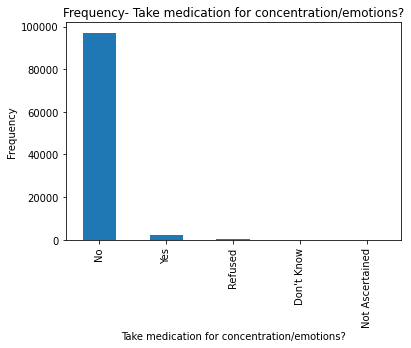

In [104]:
med_conc_freq = df['MHRX_A'].value_counts()
med_conc_props = df['MHRX_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Take medication for concentration/emotions? Frequencies:\n", med_conc_freq)
print("\nTake medication for concentration/emotions? Proportions (%):\n", med_conc_props)

# Plot bar chart for URBRRL
med_conc_freq.plot(kind='bar')
plt.title("Frequency- Take medication for concentration/emotions?")
plt.xlabel("Take medication for concentration/emotions?")
plt.ylabel('Frequency')
plt.show()

Past 12m, Receive counseling/therapy? Frequencies:
 No                 105558
Yes                 13106
Not Ascertained      1807
Refused               178
Don't Know             49
Name: MHTHRPY_A, dtype: int64

Past 12m, Receive counseling/therapy? Proportions (%):
 No                 87.456296
Yes                10.858506
Not Ascertained     1.497125
Refused             0.147476
Don't Know          0.040597
Name: MHTHRPY_A, dtype: float64


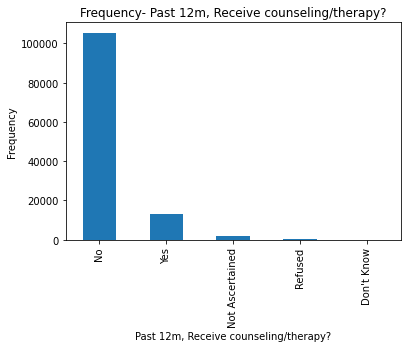

In [105]:
mental_therapy_freq = df['MHTHRPY_A'].value_counts()
mental_therapy_props = df['MHTHRPY_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, Receive counseling/therapy? Frequencies:\n", mental_therapy_freq)
print("\nPast 12m, Receive counseling/therapy? Proportions (%):\n", mental_therapy_props)

# Plot bar chart for URBRRL
mental_therapy_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, Receive counseling/therapy?")
plt.xlabel("Past 12m, Receive counseling/therapy?")
plt.ylabel('Frequency')
plt.show()

Past 12m, Delayed receiving counseling/therapy because of cost? Frequencies:
 No                 113552
Yes                  5162
Not Ascertained      1822
Refused               119
Don't Know             43
Name: MHTHDLY_A, dtype: int64

Past 12m, Delayed receiving counseling/therapy because of cost? Proportions (%):
 No                 94.079438
Yes                 4.276790
Not Ascertained     1.509553
Refused             0.098593
Don't Know          0.035626
Name: MHTHDLY_A, dtype: float64


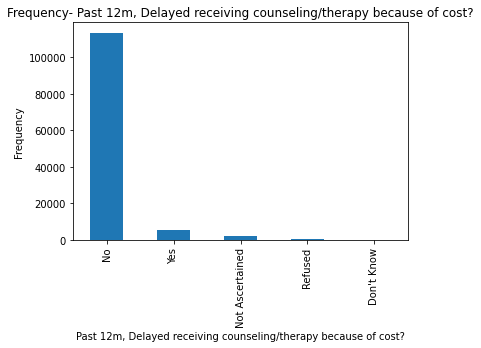

In [106]:
delay_therapy_freq = df['MHTHDLY_A'].value_counts()
delay_therapy_props = df['MHTHDLY_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Past 12m, Delayed receiving counseling/therapy because of cost? Frequencies:\n", delay_therapy_freq)
print("\nPast 12m, Delayed receiving counseling/therapy because of cost? Proportions (%):\n", delay_therapy_props)

# Plot bar chart for URBRRL
delay_therapy_freq.plot(kind='bar')
plt.title("Frequency- Past 12m, Delayed receiving counseling/therapy because of cost?")
plt.xlabel("Past 12m, Delayed receiving counseling/therapy because of cost?")
plt.ylabel('Frequency')
plt.show()

Last 2 weeks, how often did you have little interest in doing things? Frequencies:
 Not at all                 47505
Several days                7235
Nearly every day            1977
More than half the days     1580
Not Ascertained             1065
Don't Know                   150
Refused                      136
Name: PHQ81_A, dtype: int64

Last 2 weeks, how often did you have little interest in doing things? Proportions (%):
 Not at all                 79.642234
Several days               12.129493
Nearly every day            3.314445
More than half the days     2.648873
Not Ascertained             1.785475
Don't Know                  0.251475
Refused                     0.228004
Name: PHQ81_A, dtype: float64


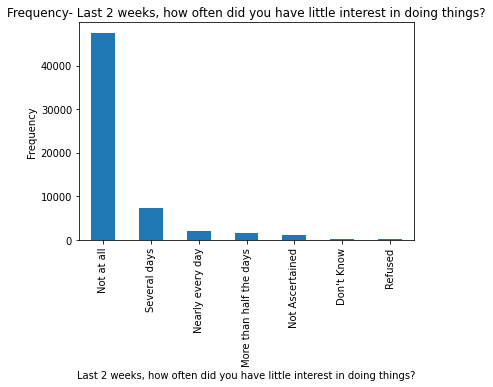

In [107]:
l2wk_nointerest_freq = df['PHQ81_A'].value_counts()
l2wk_nointerest_props = df['PHQ81_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last 2 weeks, how often did you have little interest in doing things? Frequencies:\n", l2wk_nointerest_freq)
print("\nLast 2 weeks, how often did you have little interest in doing things? Proportions (%):\n", l2wk_nointerest_props)

# Plot bar chart for URBRRL
l2wk_nointerest_freq.plot(kind='bar')
plt.title("Frequency- Last 2 weeks, how often did you have little interest in doing things?")
plt.xlabel("Last 2 weeks, how often did you have little interest in doing things?")
plt.ylabel('Frequency')
plt.show()

Last 2 weeks, how often did you feel down? Frequencies:
 Not at all                 47494
Several days                7839
Nearly every day            1609
More than half the days     1359
Not Ascertained             1083
Refused                      145
Don't Know                   119
Name: PHQ82_A, dtype: int64

Last 2 weeks, how often did you feel down? Proportions (%):
 Not at all                 79.623793
Several days               13.142100
Nearly every day            2.697492
More than half the days     2.278366
Not Ascertained             1.815652
Refused                     0.243093
Don't Know                  0.199504
Name: PHQ82_A, dtype: float64


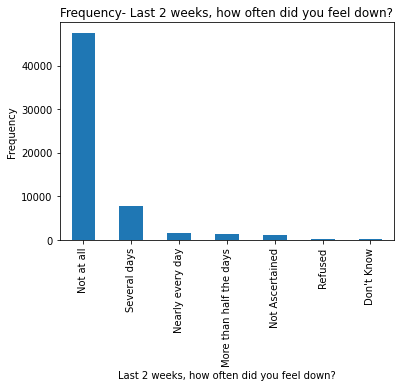

In [108]:
l2wk_feeldown_freq = df['PHQ82_A'].value_counts()
l2wk_feeldown_props = df['PHQ82_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last 2 weeks, how often did you feel down? Frequencies:\n", l2wk_feeldown_freq)
print("\nLast 2 weeks, how often did you feel down? Proportions (%):\n", l2wk_feeldown_props)

# Plot bar chart for URBRRL
l2wk_feeldown_freq.plot(kind='bar')
plt.title("Frequency- Last 2 weeks, how often did you feel down?")
plt.xlabel("Last 2 weeks, how often did you feel down?")
plt.ylabel('Frequency')
plt.show()

Last 2 weeks, how often trouble with sleeping? Frequencies:
 Not at all                 38344
Several days               11566
Nearly every day            5446
More than half the days     3007
Not Ascertained             1093
Refused                      114
Don't Know                    78
Name: PHQ83_A, dtype: int64

Last 2 weeks, how often trouble with sleeping? Proportions (%):
 Not at all                 64.283798
Several days               19.390424
Nearly every day            9.130231
More than half the days     5.041242
Not Ascertained             1.832417
Refused                     0.191121
Don't Know                  0.130767
Name: PHQ83_A, dtype: float64


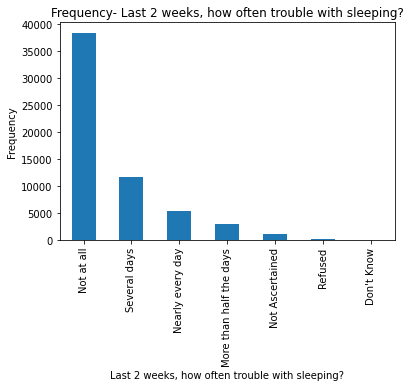

In [109]:
l2wk_sleeping_freq = df['PHQ83_A'].value_counts()
l2wk_sleeping_props = df['PHQ83_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last 2 weeks, how often trouble with sleeping? Frequencies:\n", l2wk_sleeping_freq)
print("\nLast 2 weeks, how often trouble with sleeping? Proportions (%):\n", l2wk_sleeping_props)

# Plot bar chart for URBRRL
l2wk_sleeping_freq.plot(kind='bar')
plt.title("Frequency- Last 2 weeks, how often trouble with sleeping?")
plt.xlabel("Last 2 weeks, how often trouble with sleeping?")
plt.ylabel('Frequency')
plt.show()

Last 2 weeks, how often feeling tired/low energy? Frequencies:
 Not at all                 33663
Several days               15916
Nearly every day            5417
More than half the days     3317
Not Ascertained             1101
Don't Know                   117
Refused                      117
Name: PHQ84_A, dtype: int64

Last 2 weeks, how often feeling tired/low energy? Proportions (%):
 Not at all                 56.436092
Several days               26.683208
Nearly every day            9.081612
More than half the days     5.560958
Not Ascertained             1.845829
Don't Know                  0.196151
Refused                     0.196151
Name: PHQ84_A, dtype: float64


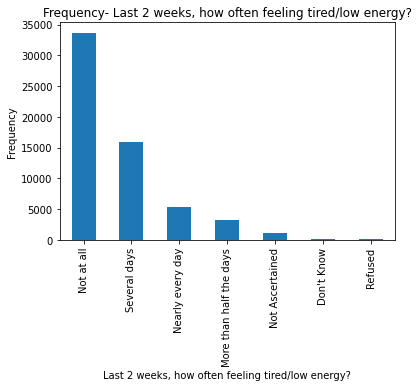

In [111]:
l2wk_tired_freq = df['PHQ84_A'].value_counts()
l2wk_tired_props = df['PHQ84_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last 2 weeks, how often feeling tired/low energy? Frequencies:\n", l2wk_tired_freq)
print("\nLast 2 weeks, how often feeling tired/low energy? Proportions (%):\n", l2wk_tired_props)

# Plot bar chart for URBRRL
l2wk_tired_freq.plot(kind='bar')
plt.title("Frequency- Last 2 weeks, how often feeling tired/low energy?")
plt.xlabel("Last 2 weeks, how often feeling tired/low energy?")
plt.ylabel('Frequency')
plt.show()

Last 2 weeks, how often poor appetite/overeating? Frequencies:
 Not at all                 47445
Several days                6600
Nearly every day            2579
More than half the days     1731
Not Ascertained             1106
Refused                      105
Don't Know                    82
Name: PHQ85_A, dtype: int64

Last 2 weeks, how often poor appetite/overeating? Proportions (%):
 Not at all                 79.541644
Several days               11.064914
Nearly every day            4.323699
More than half the days     2.902025
Not Ascertained             1.854211
Refused                     0.176033
Don't Know                  0.137473
Name: PHQ85_A, dtype: float64


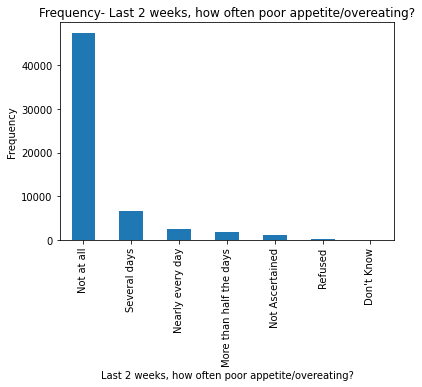

In [112]:
l2wk_appetite_freq = df['PHQ85_A'].value_counts()
l2wk_appetite_props = df['PHQ85_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last 2 weeks, how often poor appetite/overeating? Frequencies:\n", l2wk_appetite_freq)
print("\nLast 2 weeks, how often poor appetite/overeating? Proportions (%):\n", l2wk_appetite_props)

# Plot bar chart for URBRRL
l2wk_appetite_freq.plot(kind='bar')
plt.title("Frequency- Last 2 weeks, how often poor appetite/overeating?")
plt.xlabel("Last 2 weeks, how often poor appetite/overeating?")
plt.ylabel('Frequency')
plt.show()

Last 2 weeks, how often feeling bad about yourself/failure/let family down? Frequencies:
 Not at all                 50146
Several days                5436
Nearly every day            1556
More than half the days     1134
Not Ascertained             1113
Refused                      143
Don't Know                   120
Name: PHQ86_A, dtype: int64

Last 2 weeks, how often feeling bad about yourself/failure/let family down? Proportions (%):
 Not at all                 84.069877
Several days                9.113466
Nearly every day            2.608637
More than half the days     1.901153
Not Ascertained             1.865947
Refused                     0.239740
Don't Know                  0.201180
Name: PHQ86_A, dtype: float64


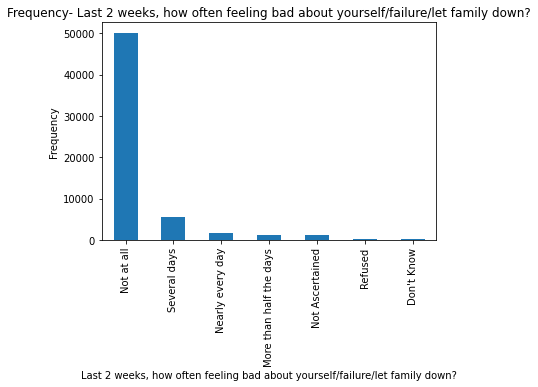

In [113]:
l2wk_badaboutself_freq = df['PHQ86_A'].value_counts()
l2wk_badaboutself_props = df['PHQ86_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last 2 weeks, how often feeling bad about yourself/failure/let family down? Frequencies:\n", l2wk_badaboutself_freq)
print("\nLast 2 weeks, how often feeling bad about yourself/failure/let family down? Proportions (%):\n", l2wk_badaboutself_props)

# Plot bar chart for URBRRL
l2wk_badaboutself_freq.plot(kind='bar')
plt.title("Frequency- Last 2 weeks, how often feeling bad about yourself/failure/let family down?")
plt.xlabel("Last 2 weeks, how often feeling bad about yourself/failure/let family down?")
plt.ylabel('Frequency')
plt.show()

Last 2 weeks, how often trouble concentrating? Frequencies:
 Not at all                 50400
Several days                5028
Nearly every day            1798
More than half the days     1117
Not Ascertained             1117
Refused                      118
Don't Know                    70
Name: PHQ87_A, dtype: int64

Last 2 weeks, how often trouble concentrating? Proportions (%):
 Not at all                 84.495708
Several days                8.429453
Nearly every day            3.014351
More than half the days     1.872653
Not Ascertained             1.872653
Refused                     0.197827
Don't Know                  0.117355
Name: PHQ87_A, dtype: float64


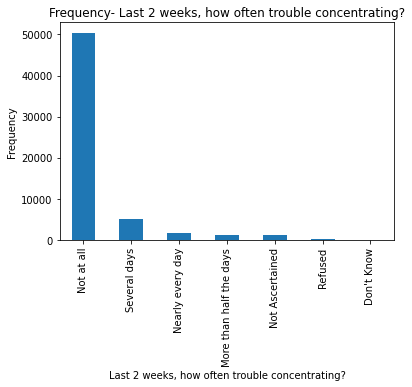

In [114]:
l2wk_troubconc_freq = df['PHQ87_A'].value_counts()
l2wk_troubconc_props = df['PHQ87_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last 2 weeks, how often trouble concentrating? Frequencies:\n", l2wk_troubconc_freq)
print("\nLast 2 weeks, how often trouble concentrating? Proportions (%):\n", l2wk_troubconc_props)

# Plot bar chart for URBRRL
l2wk_troubconc_freq.plot(kind='bar')
plt.title("Frequency- Last 2 weeks, how often trouble concentrating?")
plt.xlabel("Last 2 weeks, how often trouble concentrating?")
plt.ylabel('Frequency')
plt.show()

Last 2 weeks, how often trouble speaking? Frequencies:
 Not at all                 54437
Several days                2374
Not Ascertained             1124
Nearly every day             902
More than half the days      603
Refused                      106
Don't Know                   102
Name: PHQ88_A, dtype: int64

Last 2 weeks, how often trouble speaking? Proportions (%):
 Not at all                 91.263747
Several days                3.980016
Not Ascertained             1.884388
Nearly every day            1.512205
More than half the days     1.010931
Refused                     0.177709
Don't Know                  0.171003
Name: PHQ88_A, dtype: float64


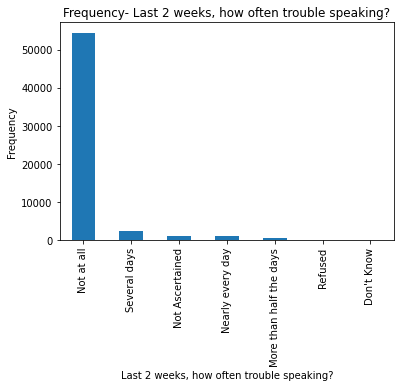

In [115]:
l2wk_troubspeaking_freq = df['PHQ88_A'].value_counts()
l2wk_troubspeaking_props = df['PHQ88_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Last 2 weeks, how often trouble speaking? Frequencies:\n", l2wk_troubspeaking_freq)
print("\nLast 2 weeks, how often trouble speaking? Proportions (%):\n", l2wk_troubspeaking_props)

# Plot bar chart for URBRRL
l2wk_troubspeaking_freq.plot(kind='bar')
plt.title("Frequency- Last 2 weeks, how often trouble speaking?")
plt.xlabel("Last 2 weeks, how often trouble speaking?")
plt.ylabel('Frequency')
plt.show()

How is your health in general? Frequencies:
 Very Good     41313
Good          34325
Excellent     26801
Fair          13828
Poor           4370
Refused          33
Don't Know       28
Name: PHSTAT_A, dtype: int64

How is your health in general? Proportions (%):
 Very Good     34.228405
Good          28.438748
Excellent     22.205008
Fair          11.456694
Poor           3.620607
Refused        0.027341
Don't Know     0.023198
Name: PHSTAT_A, dtype: float64


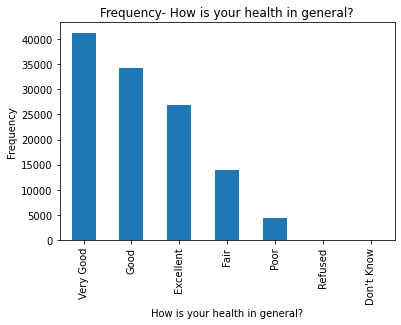

In [116]:
gen_health_freq = df['PHSTAT_A'].value_counts()
gen_health_props = df['PHSTAT_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("How is your health in general? Frequencies:\n", gen_health_freq)
print("\nHow is your health in general? Proportions (%):\n", gen_health_props)

# Plot bar chart for URBRRL
gen_health_freq.plot(kind='bar')
plt.title("Frequency- How is your health in general?")
plt.xlabel("How is your health in general?")
plt.ylabel('Frequency')
plt.show()

Difficulty in doing errands alone? Frequencies:
 No difficulty          109840
Some difficulty          5452
Cannot do at all         3294
A lot of difficulty      2049
Refused                    43
Don't Know                 20
Name: SOCERRNDS_A, dtype: int64

Difficulty in doing errands alone? Proportions (%):
 No difficulty          91.003993
Some difficulty         4.517059
Cannot do at all        2.729126
A lot of difficulty     1.697625
Refused                 0.035626
Don't Know              0.016570
Name: SOCERRNDS_A, dtype: float64


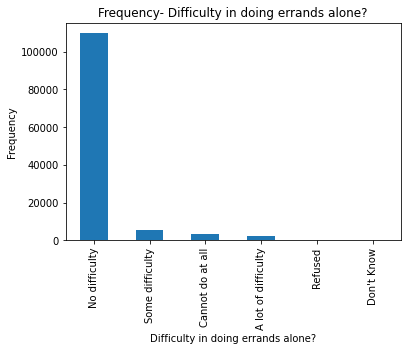

In [117]:
errands_alone_freq = df['SOCERRNDS_A'].value_counts()
errands_alone_props = df['SOCERRNDS_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty in doing errands alone? Frequencies:\n", errands_alone_freq)
print("\nDifficulty in doing errands alone? Proportions (%):\n", errands_alone_props)

# Plot bar chart for URBRRL
errands_alone_freq.plot(kind='bar')
plt.title("Frequency- Difficulty in doing errands alone?")
plt.xlabel("Difficulty in doing errands alone?")
plt.ylabel('Frequency')
plt.show()

Difficulty participating in social activities? Frequencies:
 No difficulty          109840
Some difficulty          5452
Cannot do at all         3294
A lot of difficulty      2049
Refused                    43
Don't Know                 20
Name: SOCERRNDS_A, dtype: int64

Difficulty participating in social activities? Proportions (%):
 No difficulty          91.003993
Some difficulty         4.517059
Cannot do at all        2.729126
A lot of difficulty     1.697625
Refused                 0.035626
Don't Know              0.016570
Name: SOCERRNDS_A, dtype: float64


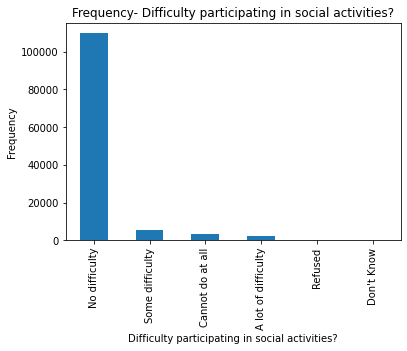

In [119]:
part_socialact_freq = df['SOCERRNDS_A'].value_counts()
part_socialact_props = df['SOCERRNDS_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty participating in social activities? Frequencies:\n", part_socialact_freq)
print("\nDifficulty participating in social activities? Proportions (%):\n", part_socialact_props)

# Plot bar chart for URBRRL
part_socialact_freq.plot(kind='bar')
plt.title("Frequency- Difficulty participating in social activities?")
plt.xlabel("Difficulty participating in social activities?")
plt.ylabel('Frequency')
plt.show()

Work limited due to health problem? Frequencies:
 No            94765
Yes           25771
Don't Know       94
Refused          68
Name: SOCWRKLIM_A, dtype: int64

Work limited due to health problem? Proportions (%):
 No            78.514143
Yes           21.351638
Don't Know     0.077880
Refused        0.056339
Name: SOCWRKLIM_A, dtype: float64


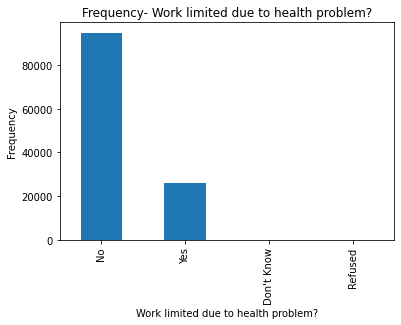

In [120]:
worklim_freq = df['SOCWRKLIM_A'].value_counts()
worklim_props = df['SOCWRKLIM_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Work limited due to health problem? Frequencies:\n", worklim_freq)
print("\nWork limited due to health problem? Proportions (%):\n", worklim_props)

# Plot bar chart for URBRRL
worklim_freq.plot(kind='bar')
plt.title("Frequency- Work limited due to health problem?")
plt.xlabel("Work limited due to health problem?")
plt.ylabel('Frequency')
plt.show()

Difficulty walking 100 yds? Frequencies:
 No difficulty          99850
Some difficulty         7516
A lot of difficulty     1779
Cannot do at all         703
Don't Know                76
Refused                   43
Name: WLK100_A, dtype: int64

Difficulty walking 100 yds? Proportions (%):
 No difficulty          90.799967
Some difficulty         6.834778
A lot of difficulty     1.617758
Cannot do at all        0.639283
Don't Know              0.069112
Refused                 0.039103
Name: WLK100_A, dtype: float64


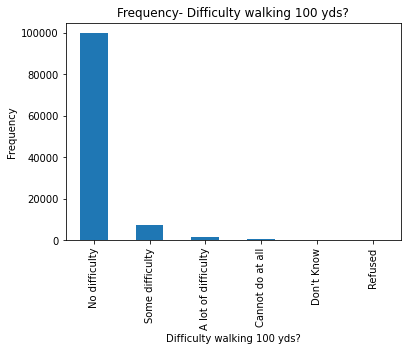

In [121]:
diff_walk100_freq = df['WLK100_A'].value_counts()
diff_walk100_props = df['WLK100_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty walking 100 yds? Frequencies:\n", diff_walk100_freq)
print("\nDifficulty walking 100 yds? Proportions (%):\n", diff_walk100_props)

# Plot bar chart for URBRRL
diff_walk100_freq.plot(kind='bar')
plt.title("Frequency- Difficulty walking 100 yds?")
plt.xlabel("Difficulty walking 100 yds?")
plt.ylabel('Frequency')
plt.show()

Difficulty walking 1/3rd of a mile? Frequencies:
 No difficulty          93367
Some difficulty         9989
A lot of difficulty     3406
Cannot do at all        2064
Don't Know               392
Refused                   46
Name: WLK13M_A, dtype: int64

Difficulty walking 1/3rd of a mile? Proportions (%):
 No difficulty          85.450835
Some difficulty         9.142078
A lot of difficulty     3.117221
Cannot do at all        1.889003
Don't Know              0.358764
Refused                 0.042100
Name: WLK13M_A, dtype: float64


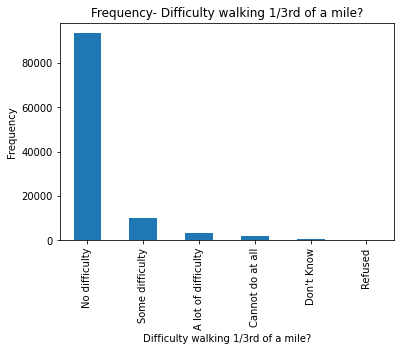

In [122]:
diff_walk3rdmile_freq = df['WLK13M_A'].value_counts()
diff_walk3rdmile_props = df['WLK13M_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty walking 1/3rd of a mile? Frequencies:\n", diff_walk3rdmile_freq)
print("\nDifficulty walking 1/3rd of a mile? Proportions (%):\n", diff_walk3rdmile_props)

# Plot bar chart for URBRRL
diff_walk3rdmile_freq.plot(kind='bar')
plt.title("Frequency- Difficulty walking 1/3rd of a mile?")
plt.xlabel("Difficulty walking 1/3rd of a mile?")
plt.ylabel('Frequency')
plt.show()

Difficulty walking up or down 12 steps? Frequencies:
 No difficulty          95940
Some difficulty        11023
A lot of difficulty     2412
Cannot do at all         470
Don't Know                80
Refused                   42
Name: STEPS_A, dtype: int64

Difficulty walking up or down 12 steps? Proportions (%):
 No difficulty          87.244355
Some difficulty        10.023916
A lot of difficulty     2.193385
Cannot do at all        0.427401
Don't Know              0.072749
Refused                 0.038193
Name: STEPS_A, dtype: float64


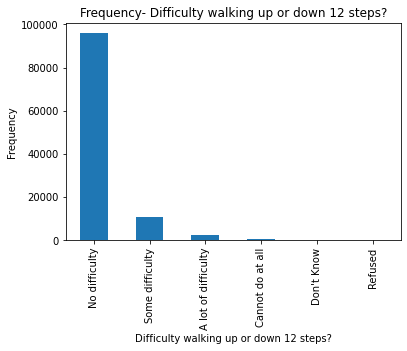

In [124]:
diff_walksteps_freq = df['STEPS_A'].value_counts()
diff_walksteps_props = df['STEPS_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty walking up or down 12 steps? Frequencies:\n", diff_walksteps_freq)
print("\nDifficulty walking up or down 12 steps? Proportions (%):\n", diff_walksteps_props)

# Plot bar chart for URBRRL
diff_walksteps_freq.plot(kind='bar')
plt.title("Frequency- Difficulty walking up or down 12 steps?")
plt.xlabel("Difficulty walking up or down 12 steps?")
plt.ylabel('Frequency')
plt.show()

Difficulty seeing even with glasses? Frequencies:
 No difficulty          99160
Some difficulty        19436
A lot of difficulty     1867
Cannot do at all         164
Don't Know                37
Refused                   34
Name: VISIONDF_A, dtype: int64

Difficulty seeing even with glasses? Proportions (%):
 No difficulty          82.155462
Some difficulty        16.103001
A lot of difficulty     1.546836
Cannot do at all        0.135876
Don't Know              0.030655
Refused                 0.028169
Name: VISIONDF_A, dtype: float64


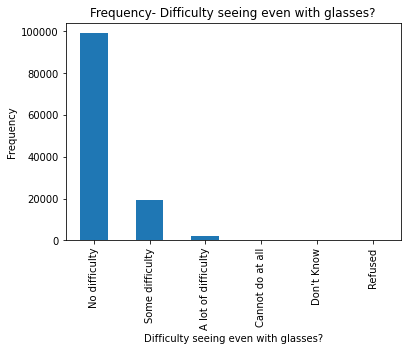

In [126]:
diff_seeing_freq = df['VISIONDF_A'].value_counts()
diff_seeing_props = df['VISIONDF_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty seeing even with glasses? Frequencies:\n", diff_seeing_freq)
print("\nDifficulty seeing even with glasses? Proportions (%):\n", diff_seeing_props)

# Plot bar chart for URBRRL
diff_seeing_freq.plot(kind='bar')
plt.title("Frequency- Difficulty seeing even with glasses?")
plt.xlabel("Difficulty seeing even with glasses?")
plt.ylabel('Frequency')
plt.show()

In [ ]:
diff_hearing_freq = df['HEARINGDF_A'].value_counts()
diff_hearing_props = df['HEARINGDF_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty hearing? Frequencies:\n", diff_hearing_freq)
print("\nDifficulty hearing? Proportions (%):\n", diff_hearing_props)

# Plot bar chart for URBRRL
diff_hearing_freq.plot(kind='bar')
plt.title("Frequency- Difficulty hearing?")
plt.xlabel("Difficulty hearing?")
plt.ylabel('Frequency')
plt.show()

Use a hearing aid? Frequencies:
 No            114006
Yes             6659
Refused           28
Don't Know         5
Name: HEARAID_A, dtype: int64

Use a hearing aid? Proportions (%):
 No            94.455583
Yes            5.517076
Refused        0.023198
Don't Know     0.004143
Name: HEARAID_A, dtype: float64


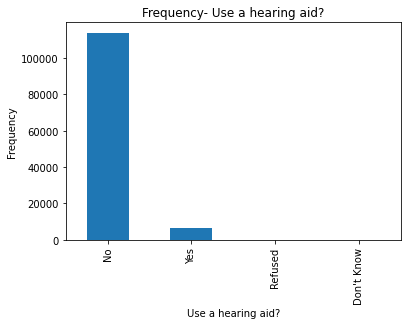

In [127]:
hearing_aid_freq = df['HEARAID_A'].value_counts()
hearing_aid_props = df['HEARAID_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Use a hearing aid? Frequencies:\n", hearing_aid_freq)
print("\nUse a hearing aid? Proportions (%):\n", hearing_aid_props)

# Plot bar chart for URBRRL
hearing_aid_freq.plot(kind='bar')
plt.title("Frequency- Use a hearing aid?")
plt.xlabel("Use a hearing aid?")
plt.ylabel('Frequency')
plt.show()

Difficulty communicating? Frequencies:
 No difficulty          114639
Some difficulty          5151
A lot of difficulty       722
Cannot do at all          142
Refused                    30
Don't Know                 14
Name: COMDIFF_A, dtype: int64

Difficulty communicating? Proportions (%):
 No difficulty          94.980033
Some difficulty         4.267676
A lot of difficulty     0.598187
Cannot do at all        0.117649
Refused                 0.024855
Don't Know              0.011599
Name: COMDIFF_A, dtype: float64


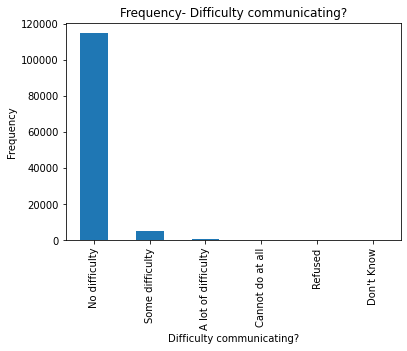

In [128]:
diff_comm_freq = df['COMDIFF_A'].value_counts()
diff_comm_props = df['COMDIFF_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty communicating? Frequencies:\n", diff_comm_freq)
print("\nDifficulty communicating? Proportions (%):\n", diff_comm_props)

# Plot bar chart for URBRRL
diff_comm_freq.plot(kind='bar')
plt.title("Frequency- Difficulty communicating?")
plt.xlabel("Difficulty communicating?")
plt.ylabel('Frequency')
plt.show()

Difficulty remembering/concentrating? Frequencies:
 No difficulty          96850
Some difficulty        20880
A lot of difficulty     2782
Cannot do at all         114
Refused                   37
Don't Know                35
Name: COGMEMDFF_A, dtype: int64

Difficulty remembering/concentrating? Proportions (%):
 No difficulty          80.241595
Some difficulty        17.299375
A lot of difficulty     2.304926
Cannot do at all        0.094451
Refused                 0.030655
Don't Know              0.028998
Name: COGMEMDFF_A, dtype: float64


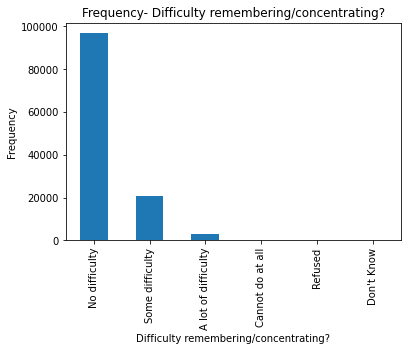

In [130]:
diff_remconc_freq = df['COGMEMDFF_A'].value_counts()
diff_remconc_props = df['COGMEMDFF_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty remembering/concentrating? Frequencies:\n", diff_remconc_freq)
print("\nDifficulty remembering/concentrating? Proportions (%):\n", diff_remconc_props)

# Plot bar chart for URBRRL
diff_remconc_freq.plot(kind='bar')
plt.title("Frequency- Difficulty remembering/concentrating?")
plt.xlabel("Difficulty remembering/concentrating?")
plt.ylabel('Frequency')
plt.show()

Difficulty with self care- washing/dressing? Frequencies:
 No difficulty          115251
Some difficulty          4045
A lot of difficulty       896
Cannot do at all          461
Refused                    36
Don't Know                  9
Name: UPPSLFCR_A, dtype: int64

Difficulty with self care- washing/dressing? Proportions (%):
 No difficulty          95.487083
Some difficulty         3.351340
A lot of difficulty     0.742349
Cannot do at all        0.381945
Refused                 0.029827
Don't Know              0.007457
Name: UPPSLFCR_A, dtype: float64


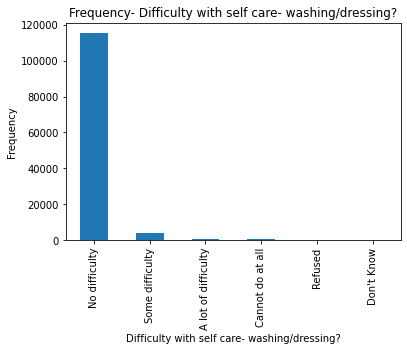

In [131]:
diff_selfcare_freq = df['UPPSLFCR_A'].value_counts()
diff_selfcare_props = df['UPPSLFCR_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty with self care- washing/dressing? Frequencies:\n", diff_selfcare_freq)
print("\nDifficulty with self care- washing/dressing? Proportions (%):\n", diff_selfcare_props)

# Plot bar chart for URBRRL
diff_selfcare_freq.plot(kind='bar')
plt.title("Frequency- Difficulty with self care- washing/dressing?")
plt.xlabel("Difficulty with self care- washing/dressing?")
plt.ylabel('Frequency')
plt.show()

Difficulty using hands such as picking up objects? Frequencies:
 No difficulty          109181
Some difficulty          9155
A lot of difficulty      1984
Cannot do at all          330
Refused                    35
Don't Know                 13
Name: UPPOBJCT_A, dtype: int64

Difficulty using hands such as picking up objects? Proportions (%):
 No difficulty          90.458003
Some difficulty         7.585047
A lot of difficulty     1.643772
Cannot do at all        0.273410
Refused                 0.028998
Don't Know              0.010771
Name: UPPOBJCT_A, dtype: float64


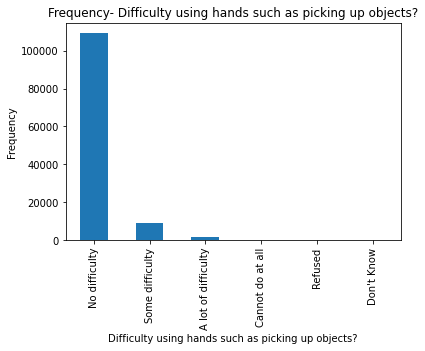

In [132]:
diff_pickobjects_freq = df['UPPOBJCT_A'].value_counts()
diff_pickobjects_props = df['UPPOBJCT_A'].value_counts(normalize=True) * 100
# Print frequencies and proportions
print("Difficulty using hands such as picking up objects? Frequencies:\n", diff_pickobjects_freq)
print("\nDifficulty using hands such as picking up objects? Proportions (%):\n", diff_pickobjects_props)

# Plot bar chart for URBRRL
diff_pickobjects_freq.plot(kind='bar')
plt.title("Frequency- Difficulty using hands such as picking up objects?")
plt.xlabel("Difficulty using hands such as picking up objects?")
plt.ylabel('Frequency')
plt.show()